# Российские корпоративные данные: RFSD

## Russian Financial Statements Database (RFSD)

[RFSD](https://github.com/irlcode/RFSD) - это открытая база данных финансовой отчетности российских компаний за 2011-2024 годы.

**Основные характеристики:**
- Первая открытая база данных с информацией о всех активных компаниях России
- Включает компании, которые не подавали отчетность (non-filing firms)
- Источники данных: Росстат и Федеральная налоговая служба
- Покрывает период 2011-2024, обновляется ежегодно
- Данные восстановлены через неинвазивную импутацию, артикуляцию и гармонизацию

**Формат данных:**
- Структурированный формат Apache Parquet с партиционированием по годам
- Неконсолидированная отчетность (форма №1, форма №2, форма №4)
- Позволяет запрашивать только нужные переменные в масштабе

**Документация:**
- GitHub: https://github.com/irlcode/RFSD
- Статья: https://doi.org/10.1038/s41597-025-05150-1


### ОКВЭД: Общероссийский классификатор видов экономической деятельности

**ОКВЭД 2** (Общероссийский классификатор видов экономической деятельности, редакция 2) - это классификатор видов экономической деятельности, используемый в России для кодирования видов деятельности юридических лиц и индивидуальных предпринимателей.

### Что такое ОКВЭД?

ОКВЭД используется для:
- **Статистического учета** - группировки предприятий по видам деятельности
- **Налогообложения** - определения налогового режима
- **Регистрации** - указания видов деятельности при создании компании
- **Анализа** - сравнения компаний из одной отрасли

### Структура кода ОКВЭД:

Код ОКВЭД имеет иерархическую структуру:
- **Секция** (буква A-U) - крупные отрасли экономики
- **Класс** (2 цифры, например `01`) - общая группа видов деятельности
- **Подкласс** (3-4 цифры, например `01.1`) - более детальная группа
- **Группа** (5-6 цифр, например `01.11`) - конкретная группа видов деятельности
- **Подгруппа** (7-8 цифр, например `01.11.1`) - детальная подгруппа
- **Вид** (9-10 цифр, например `01.11.11`) - конкретный вид деятельности

**Пример:** `46.35.1` означает:
- `46` - Торговля оптовая непродовольственными потребительскими товарами
- `46.3` - Торговля оптовая пищевыми продуктами, напитками и табачными изделиями
- `46.35` - Торговля оптовая напитками
- `46.35.1` - Торговля оптовая безалкогольными напитками

### Основной и дополнительные коды ОКВЭД:

При регистрации компании указываются:

1. **Основной код ОКВЭД** - основной вид экономической деятельности компании
   - Определяется по тому виду деятельности, который приносит **наибольшую долю в выручке**
   - Используется для статистической отчетности и классификации компании

2. **Дополнительные коды ОКВЭД** - другие виды деятельности, которыми занимается компания
   - Может быть несколько дополнительных кодов
   - Компания может заниматься любыми видами деятельности, указанными в кодах

**Важно:** Компания может иметь несколько кодов ОКВЭД, но только один основной. 

В RFSD и других подобных сервисах обычно хранится основной код ОКВЭД компании.

### Секции ОКВЭД 2:

- **A** - Сельское, лесное хозяйство, охота, рыболовство и рыбоводство
- **B** - Добыча полезных ископаемых
- **C** - Обрабатывающие производства
- **D** - Обеспечение электрической энергией, газом и паром; кондиционирование воздуха
- **E** - Водоснабжение; водоотведение, организация сбора и утилизации отходов
- **F** - Строительство
- **G** - Торговля оптовая и розничная
- **H** - Транспортировка и хранение
- **I** - Деятельность гостиниц и предприятий общественного питания
- **J** - Деятельность в области информации и связи
- **K** - Деятельность финансовая и страховая
- **L** - Операции с недвижимым имуществом
- **M** - Деятельность профессиональная, научная и техническая
- **N** - Деятельность административная и сопутствующие дополнительные услуги
- **O** - Государственное управление и обеспечение военной безопасности
- **P** - Образование
- **Q** - Деятельность в области здравоохранения и социальных услуг
- **R** - Деятельность в области культуры, спорта, организации досуга и развлечений
- **S** - Предоставление прочих видов услуг
- **T** - Деятельность домашних хозяйств как работодателей
- **U** - Деятельность экстерриториальных организаций и органов

### Использование ОКВЭД в анализе:

В RFSD переменная `okved` содержит основной код ОКВЭД компании, а `okved_section` - секцию (букву A-U). Это позволяет:
- Группировать компании по отраслям
- Сравнивать финансовые показатели компаний из одной отрасли
- Анализировать отраслевую структуру экономики
- Выявлять отраслевые закономерности

**Пример:** Для анализа нефтегазовых компаний можно использовать секцию `B` (Добыча полезных ископаемых) или более конкретные коды, например `06` (Добыча сырой нефти и природного газа).


**ВОПРОС**. Какой основной  код ОКВЭД имеет ПАО "Газпром"?

### Работа со справочником ОКВЭД

Для расшифровки кодов ОКВЭД можно использовать справочник, который содержит все коды с их названиями и описаниями.


In [2]:
# Загрузка справочника ОКВЭД 2
import json
from pathlib import Path
import polars as pl

OKVED_PATH = Path("../metadata/okved_2.json")

# Загружаем справочник ОКВЭД
with open(OKVED_PATH, 'r', encoding='utf-8') as f:
    okved_dict = json.load(f)

# Конвертируем в Polars DataFrame для удобной работы
okved_df = pl.DataFrame(okved_dict)

print(f"Загружено {len(okved_df):,} кодов ОКВЭД")
print(f"\nСтруктура справочника:")
print(okved_df.head())
print(f"\nСтолбцы: {okved_df.columns}")


Загружено 2,818 кодов ОКВЭД

Структура справочника:
shape: (5, 5)
┌──────────┬─────────────┬─────────┬─────────────────────────────────┬───────────────────────────┐
│ code     ┆ parent_code ┆ section ┆ name                            ┆ comment                   │
│ ---      ┆ ---         ┆ ---     ┆ ---                             ┆ ---                       │
│ str      ┆ str         ┆ str     ┆ str                             ┆ str                       │
╞══════════╪═════════════╪═════════╪═════════════════════════════════╪═══════════════════════════╡
│ 01       ┆ A           ┆ A       ┆ Растениеводство и животноводст… ┆ Эта группировка включает: │
│          ┆             ┆         ┆                                 ┆ - дв…                     │
│ 01.1     ┆ 01          ┆ A       ┆ Выращивание однолетних культур  ┆ Эта группировка включает: │
│          ┆             ┆         ┆                                 ┆ - вы…                     │
│ 01.11    ┆ 01.1        ┆ A       ┆ Выращи

In [3]:
# Функция для расшифровки кода ОКВЭД
def decode_okved(code, okved_data=okved_df):
    """
    Расшифровывает код ОКВЭД, возвращая название и описание
    
    Parameters:
    -----------
    code : str
        Код ОКВЭД (например, "46.35.1" или "01.11")
    okved_data : pl.DataFrame
        DataFrame со справочником ОКВЭД
        
    Returns:
    --------
    dict
        Словарь с информацией о коде ОКВЭД
    """
    result = okved_data.filter(pl.col('code') == code)
    
    if len(result) > 0:
        row = result.row(0, named=True)
        return {
            'code': row['code'],
            'name': row['name'],
            'section': row['section'],
            'parent_code': row.get('parent_code', None),
            'comment': row.get('comment', '')
        }
    else:
        return None

# Примеры использования
examples = ['46.35.1', '01.11', '06.10']
print("Примеры расшифровки кодов ОКВЭД:")
for code in examples:
    decoded = decode_okved(code)
    if decoded:
        print(f"\nКод: {decoded['code']}")
        print(f"Название: {decoded['name']}")
        print(f"Секция: {decoded['section']}")
    else:
        print(f"\nКод {code} не найден в справочнике")


Примеры расшифровки кодов ОКВЭД:

Код 46.35.1 не найден в справочнике

Код: 01.11
Название: Выращивание зерновых (кроме риса), зернобобовых культур и семян масличных культур
Секция: A

Код: 06.10
Название: Добыча нефти и нефтяного (попутного) газа
Секция: B


In [3]:
# Поиск кодов ОКВЭД по ключевым словам
def find_okved_by_keyword(keyword, okved_data=okved_df):
    """
    Находит коды ОКВЭД по ключевому слову в названии
    
    Parameters:
    -----------
    keyword : str
        Ключевое слово для поиска
    okved_data : pl.DataFrame
        DataFrame со справочником ОКВЭД
        
    Returns:
    --------
    pl.DataFrame
        DataFrame с найденными кодами ОКВЭД
    """
    return (
        okved_data
        .filter(pl.col('name').str.to_lowercase().str.contains(keyword.lower()))
        .select(['code', 'name', 'section'])
    )

# Пример: поиск кодов связанных с нефтью
print("Коды ОКВЭД, связанные с 'нефть':")
oil_codes = find_okved_by_keyword('нефт')
print(oil_codes.head(10))


Коды ОКВЭД, связанные с 'нефть':
shape: (10, 3)
┌─────────┬─────────────────────────────────┬─────────┐
│ code    ┆ name                            ┆ section │
│ ---     ┆ ---                             ┆ ---     │
│ str     ┆ str                             ┆ str     │
╞═════════╪═════════════════════════════════╪═════════╡
│ 06      ┆ Добыча нефти и природного газа  ┆ B       │
│ 06.1    ┆ Добыча нефти и нефтяного (попу… ┆ B       │
│ 06.10   ┆ Добыча нефти и нефтяного (попу… ┆ B       │
│ 06.10.1 ┆ Добыча нефти                    ┆ B       │
│ 06.10.3 ┆ Добыча нефтяного (попутного) г… ┆ B       │
│ 09.1    ┆ Предоставление услуг в области… ┆ B       │
│ 09.10   ┆ Предоставление услуг в области… ┆ B       │
│ 09.10.1 ┆ Предоставление услуг по бурени… ┆ B       │
│ 09.10.3 ┆ Предоставление услуг по доразв… ┆ B       │
│ 09.10.9 ┆ Предоставление прочих услуг в … ┆ B       │
└─────────┴─────────────────────────────────┴─────────┘


---

### Практическое задание 1: Работа со справочником ОКВЭД

**Время: 5-7 минут**

**Задание:**
1. Используя функцию `decode_okved()`, расшифруйте следующие коды ОКВЭД:
   - `62.01` 
   - `47.11` 
   - `64.20` 

2. Используя функцию `find_okved_by_keyword()`, найдите все коды ОКВЭД, связанные с:
   - "финанс"
   - "строитель"
   - "образован"

3. Определите, к какой секции ОКВЭД относятся найденные коды.



In [4]:
# Ваше решение здесь:


## Формат данных: Parquet vs CSV

RFSD использует формат **Apache Parquet** вместо традиционного CSV. Понимание различий важно для эффективной работы с данными.

### Что такое Parquet?

**Apache Parquet** - это колоночно-ориентированный формат хранения данных, оптимизированный для аналитических запросов и работы с большими данными.

### Преимущества Parquet перед CSV:

1. **Эффективность памяти:**
   - Parquet использует сжатие данных (обычно в 5-10 раз меньше размер файла)
   - CSV хранит все данные в текстовом виде без сжатия
   - Пример: CSV файл 10 GB может занимать всего 1-2 GB в формате Parquet

2. **Скорость чтения:**
   - Parquet позволяет читать только нужные столбцы (column pruning)
   - CSV всегда читает весь файл целиком
   - Для анализа с 10 столбцами из 200 это означает чтение в 20 раз меньше данных

3. **Типы данных:**
   - Parquet сохраняет типы данных (int, float, date, string)
   - CSV хранит все как текст, требуется дальнейший парсинг при чтении
   - Меньше ошибок и быстрее обработка

4. **Метаданные:**
   - Parquet содержит схему данных (schema) в файле
   - CSV требует угадывать или указывать типы данных вручную
   - Упрощает работу с данными

5. **Партиционирование:**
   - Parquet поддерживает эффективное партиционирование (например, по годам)
   - Можно читать только нужные партиции
   - CSV требует чтения всего файла даже для выборки по одному году

6. **Оптимизация запросов:**
   - Parquet поддерживает predicate pushdown (фильтрация на уровне чтения)
   - Фильтры применяются ДО загрузки данных в память
   - CSV требует загрузки всех данных перед фильтрацией

### Когда использовать CSV?

CSV все еще полезен для:
- Небольших файлов (< 100 MB)
- Обмена данными с людьми (читаемость). 
- Простых задач без требований к производительности
- Загрузки в Excel (относительно простой)

### Для RFSD (60+ млн строк):

Parquet критически важен, потому что:
- Полный датасет в CSV занял бы ~50-100 GB
- В Parquet это ~7-10 GB (сжатие)
- Чтение только нужных столбцов ускоряет работу в десятки раз
- Фильтрация на уровне чтения экономит память и время

**Вывод:** Для больших аналитических датасетов Parquet - стандарт индустрии. Современные инструменты (Polars, DuckDB и проч.) оптимизированы для работы с Parquet. В большинстве случаев нет особо важных причин для использования CSV. 


## Pandas vs Polars: когда что использовать?

В этом курсе мы будем использовать **Polars** для работы с большими данными RFSD, но также упоминаем **pandas**. Важно понимать различия и когда использовать каждую библиотеку.

### Что общего?

Обе библиотеки предоставляют:
- DataFrame структуру данных (таблицы с именованными столбцами)
- Похожий API для основных операций (фильтрация, группировка, агрегация)
- Интеграцию с другими библиотеками Python (matplotlib, numpy)
- Поддержку работы с различными форматами данных (CSV, Parquet, Excel)

### Ключевые различия:

| Характеристика | Pandas | Polars |
|----------------|--------|--------|
| **Производительность** | Медленнее для больших данных | В 5-30 раз быстрее |
| **Многопоточность** | Однопоточный по умолчанию | Многопоточный по умолчанию |
| **Память** | Копирует данные при операциях | Более эффективное использование памяти |
| **Lazy Evaluation** | Нет (eager execution) | Да (опционально через LazyFrame) |
| **API** | Более зрелый, больше функций | Более современный, фокусированный |
| **Сообщество** | Огромное, много примеров | Растущее, меньше примеров |
| **Совместимость** | Стандарт индустрии | Новый, но быстро набирает популярность |

### Когда использовать Pandas?

**Pandas подходит для:**
- Небольших и средних датасетов (< 1-2 GB в памяти)
- Когда нужны специфические функции pandas (например, `pivot_table`, `melt`)
- Работы с существующим кодом на pandas
- Интеграции с библиотеками, которые требуют pandas (например, некоторые визуализации)
- Обучения (больше примеров и документации)

**Примеры использования pandas:**
```python
import pandas as pd
df = pd.read_csv('small_data.csv')  # Небольшой файл
df.groupby('region')['revenue'].mean()  # Простые операции
df.plot()  # Встроенная визуализация
```

### Когда использовать Polars?

**Polars подходит для:**
- Больших датасетов (> 1-2 GB, миллионы строк)
- Когда важна скорость выполнения
- Работы с Parquet файлами (оптимизирован для этого)
- Когда нужно обработать данные быстрее
- Параллельных вычислений

**Примеры использования Polars:**
```python
import polars as pl
# Lazy API - ничего не загружается до .collect()
lf = pl.scan_parquet('large_data.parquet')
result = lf.filter(pl.col('revenue') > 1_000_000).collect()
```

### Синтаксические различия:

**Pandas:**
```python
df[df['revenue'] > 1000000]  # Булева индексация
df.groupby('region')['revenue'].mean()  # Группировка
df['new_col'] = df['col1'] + df['col2']  # Создание столбца
```

**Polars:**
```python
df.filter(pl.col('revenue') > 1000000)  # Метод filter
df.group_by('region').agg(pl.col('revenue').mean())  # Группировка
df.with_columns((pl.col('col1') + pl.col('col2')).alias('new_col'))  # Создание столбца
```

### Стратегия для RFSD:

В этом ноутбуке мы используем **гибридный подход**:

1. **Polars для загрузки и обработки больших данных:**
   - Загрузка данных из Parquet файлов
   - Фильтрация и выбор столбцов
   - Группировка и агрегация
   - Расчет финансовых показателей

2. **Pandas для визуализации:**
   - Конвертируем небольшие подвыборки из Polars в pandas
   - Используем matplotlib/seaborn для графиков
   - Pandas удобнее для интерактивной визуализации

**Пример гибридного подхода:**
```python
# Polars для эффективной обработки
df_polars = pl.scan_parquet('data.parquet').filter(...).collect()

# Конвертация в pandas для визуализации
df_pandas = df_polars.to_pandas()
df_pandas.plot()  # Используем pandas для графиков
```

### Миграция между библиотеками:

- **Polars → Pandas:** `.to_pandas()` (просто)
- **Pandas → Polars:** `pl.from_pandas()` (просто)
- Конвертация обычно быстрая для небольших датасетов

### Вывод:

- **Для RFSD (60+ млн строк):** Используем **Polars** - это критически важно для производительности
- **Для визуализации:** Используем **pandas** - удобнее и больше возможностей
- **Для обучения:** Знание обеих библиотек полезно, так как pandas все еще стандарт индустрии

**Рекомендация:** Начните с Polars для больших данных, конвертируйте в pandas только когда нужно для визуализации или специфических функций pandas.


---

### Практическое задание 2: Сравнение CSV и Parquet на практике

**Время: 10-15 минут**

**Цель:** Практически сравнить форматы CSV и Parquet, чтобы понять их преимущества и недостатки в производительности и размере.

**Задание:**

1.  **Создание тестовых данных:**
    *   Создайте `pandas` DataFrame размером 1,000,000 строк и 20 столбцов.
    *   Заполните его случайными данными: 10 столбцов с числами с плавающей запятой (`float`), 5 столбцов с целыми числами (`int`) и 5 столбцов с текстовыми данными (короткими строками).

2.  **Сохранение в форматы:**
    *   Сохраните этот DataFrame в файл `data.csv`.
    *   Сохраните этот же DataFrame в файл `data.parquet`.

3.  **Сравнение размеров:**
    *   Проверьте и сравните размеры получившихся файлов `data.csv` и `data.parquet` на диске. Какой из них меньше и почему?

4.  **Сравнение скорости чтения:**
    *   Используя `polars`, измерьте время, необходимое для полного чтения файла `data.csv` (`pl.read_csv`).
    *   Измерьте время, необходимое для полного чтения файла `data.parquet` (`pl.read_parquet`).
    *   Сравните время.

5.  **Демонстрация Column Pruning:**
    *   Измерьте время чтения только 3-х столбцов из файла `data.parquet` с помощью `pl.read_parquet(..., columns=['название_столбца_1', 'название_столбца_2', 'название_столбца_3'])`.
    *   Сравните это время с временем полного чтения Parquet-файла. Как `column pruning` влияет на скорость?

**Подсказки:**
*   Для создания DataFrame: `import pandas as pd; import numpy as np`.
*   Для случайных данных: `np.random.rand()`, `np.random.randint()`, и для строк можно сгенерировать случайные.
*   Для проверки размера файла: `import os; os.path.getsize('filename')`.
*   Для измерения времени: `import time; start = time.time(); ...; end = time.time(); print(end - start)`.



In [12]:
# Ваше решение здесь:
import pandas as pd
import numpy as np
import polars as pl
import os
import time
import random
import string

# 1. Создание тестовых данных
# ==========================
# print("Создание тестового DataFrame...")
# num_rows = 1_000_000
# data = {
#     **{f'float_col_{i}': np.random.rand(num_rows) for i in range(10)},
#     **{f'int_col_{i}': np.random.randint(0, 1000, size=num_rows) for i in range(5)},
#     **{f'str_col_{i}': [''.join(random.choices(string.ascii_lowercase, k=8)) for _ in range(num_rows)] for i in range(5)}
# }
# df_pandas = pd.DataFrame(data)
# print("DataFrame создан. Размер в памяти:", f"{df_pandas.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


# 2. Сохранение в форматы
# =======================
# print("\nСохранение в CSV и Parquet...")
# df_pandas.to_csv('data.csv', index=False)
# df_pandas.to_parquet('data.parquet', index=False)
# print("Файлы сохранены.")


# 3. Сравнение размеров
# ======================
# size_csv = os.path.getsize('data.csv')
# size_parquet = os.path.getsize('data.parquet')
# print(f"\nРазмер data.csv: {size_csv / 1024**2:.2f} MB")
# print(f"Размер data.parquet: {size_parquet / 1024**2:.2f} MB")
# print(f"Parquet-файл меньше в {size_csv / size_parquet:.2f} раз")


# 4. Сравнение скорости чтения
# ============================
# print("\nСравнение скорости чтения...")
# # Чтение CSV
# start_time = time.time()
# df_csv = pl.read_csv('data.csv')
# time_csv = time.time() - start_time
# print(f"Время чтения CSV: {time_csv:.2f} сек")

# # Чтение Parquet
# start_time = time.time()
# df_parquet = pl.read_parquet('data.parquet')
# time_parquet = time.time() - start_time
# print(f"Время чтения Parquet: {time_parquet:.2f} сек")
# print(f"Чтение Parquet быстрее в {time_csv / time_parquet:.2f} раз")


# 5. Демонстрация Column Pruning
# ==============================
# columns_to_read = ['float_col_0', 'int_col_0', 'str_col_0']
# print(f"\nЧтение только 3 столбцов из Parquet: {columns_to_read}...")

# start_time = time.time()
# df_partial = pl.read_parquet('data.parquet', columns=columns_to_read)
# time_partial = time.time() - start_time
# print(f"Время чтения 3 столбцов: {time_partial:.2f} сек")
# print(f"Column pruning ускоряет чтение в {time_parquet / time_partial:.2f} раз по сравнению с полным чтением Parquet")
# print("\nПервые 5 строк прочитанных данных:")
# print(df_partial.head())

# # Очистка созданных файлов
# # os.remove('data.csv')
# # os.remove('data.parquet')

### Основы Polars: краткий справочник

Давайте рассмотрим основные операции в `polars` на простом примере. Это поможет вам быстрее освоиться с синтаксисом, который мы будем использовать дальше.

**Ключевые концепции Polars:**

1.  **Выражения (`pl.col`, `pl.lit`)**:
    *   `pl.col("column_name")`: Ссылка на столбец. Почти все операции начинаются с этого.
    *   `pl.lit(value)`: Ссылка на литерал (конкретное значение), чтобы отличать его от столбца.

2.  **Цепочки методов (Method Chaining)**: Операции в `polars` выстраиваются в логическую цепочку, что делает код читаемым и эффективным.

3.  **Контексты (`select`, `with_columns`, `filter`)**: Выражения выполняются внутри одного из этих методов-контекстов.

**Основные методы:**

*   `.select()`: Выбор и трансформация столбцов. Можно создавать новые столбцы.
*   `.filter()`: Фильтрация строк по условию.
*   `.with_columns()`: Добавление или изменение столбцов.
*   `.group_by()`: Группировка данных по одному или нескольким столбцам.
*   `.agg()`: Агрегация данных после группировки (расчет суммы, среднего и т.д.).
*   `.sort()`: Сортировка данных.
*   `.join()`: Объединение таблиц.

Ниже приведен практический пример, демонстрирующий эти функции.


In [7]:
import polars as pl 
# --- Практический пример: основы Polars ---

# 1. Создаем тестовый DataFrame
df_example = pl.DataFrame({
    "department": ["sales", "engineering", "sales", "hr", "engineering", "hr", "sales"],
    "employee_name": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace"],
    "salary": [70000, 80000, 75000, 60000, 90000, 65000, 72000],
    "projects_completed": [5, 10, 6, 2, 12, 3, 5]
})

print("--- Исходный DataFrame ---")
print(df_example)

--- Исходный DataFrame ---
shape: (7, 4)
┌─────────────┬───────────────┬────────┬────────────────────┐
│ department  ┆ employee_name ┆ salary ┆ projects_completed │
│ ---         ┆ ---           ┆ ---    ┆ ---                │
│ str         ┆ str           ┆ i64    ┆ i64                │
╞═════════════╪═══════════════╪════════╪════════════════════╡
│ sales       ┆ Alice         ┆ 70000  ┆ 5                  │
│ engineering ┆ Bob           ┆ 80000  ┆ 10                 │
│ sales       ┆ Charlie       ┆ 75000  ┆ 6                  │
│ hr          ┆ David         ┆ 60000  ┆ 2                  │
│ engineering ┆ Eve           ┆ 90000  ┆ 12                 │
│ hr          ┆ Frank         ┆ 65000  ┆ 3                  │
│ sales       ┆ Grace         ┆ 72000  ┆ 5                  │
└─────────────┴───────────────┴────────┴────────────────────┘


In [6]:
# 2. .select() - Выбор и создание столбцов
# Выберем имена сотрудников и их зарплату в тысячах
df_selected = df_example.select([
    pl.col("employee_name"),
    (pl.col("salary") / 1000).alias("salary_k")
])
print("\n--- .select(): Имена и зарплата в тысячах ---")
print(df_selected)


--- .select(): Имена и зарплата в тысячах ---
shape: (7, 2)
┌───────────────┬──────────┐
│ employee_name ┆ salary_k │
│ ---           ┆ ---      │
│ str           ┆ f64      │
╞═══════════════╪══════════╡
│ Alice         ┆ 70.0     │
│ Bob           ┆ 80.0     │
│ Charlie       ┆ 75.0     │
│ David         ┆ 60.0     │
│ Eve           ┆ 90.0     │
│ Frank         ┆ 65.0     │
│ Grace         ┆ 72.0     │
└───────────────┴──────────┘


In [ ]:
df_example["employee_name"] # как в pandas - будет работать, но это не синтаксис polars 

employee_name
str
"""Alice"""
"""Bob"""
"""Charlie"""
"""David"""
"""Eve"""
"""Frank"""
"""Grace"""


In [9]:
# 3. .filter() - Фильтрация строк
# Найдем инженеров с зарплатой выше 85000
df_filtered = df_example.filter(
    (pl.col("department") == "engineering") & (pl.col("salary") > 85000)
)
print("\n--- .filter(): Инженеры с высокой зарплатой ---")
print(df_filtered)



--- .filter(): Инженеры с высокой зарплатой ---
shape: (1, 4)
┌─────────────┬───────────────┬────────┬────────────────────┐
│ department  ┆ employee_name ┆ salary ┆ projects_completed │
│ ---         ┆ ---           ┆ ---    ┆ ---                │
│ str         ┆ str           ┆ i64    ┆ i64                │
╞═════════════╪═══════════════╪════════╪════════════════════╡
│ engineering ┆ Eve           ┆ 90000  ┆ 12                 │
└─────────────┴───────────────┴────────┴────────────────────┘


In [10]:
# 4. .with_columns() - Добавление новых столбцов
# Добавим столбец с эффективностью (зарплата на один проект)
df_with_efficiency = df_example.with_columns(
    (pl.col("salary") / pl.col("projects_completed")).alias("cost_per_project")
)
print("\n--- .with_columns(): Добавили столбец эффективности ---")
print(df_with_efficiency)


--- .with_columns(): Добавили столбец эффективности ---
shape: (7, 5)
┌─────────────┬───────────────┬────────┬────────────────────┬──────────────────┐
│ department  ┆ employee_name ┆ salary ┆ projects_completed ┆ cost_per_project │
│ ---         ┆ ---           ┆ ---    ┆ ---                ┆ ---              │
│ str         ┆ str           ┆ i64    ┆ i64                ┆ f64              │
╞═════════════╪═══════════════╪════════╪════════════════════╪══════════════════╡
│ sales       ┆ Alice         ┆ 70000  ┆ 5                  ┆ 14000.0          │
│ engineering ┆ Bob           ┆ 80000  ┆ 10                 ┆ 8000.0           │
│ sales       ┆ Charlie       ┆ 75000  ┆ 6                  ┆ 12500.0          │
│ hr          ┆ David         ┆ 60000  ┆ 2                  ┆ 30000.0          │
│ engineering ┆ Eve           ┆ 90000  ┆ 12                 ┆ 7500.0           │
│ hr          ┆ Frank         ┆ 65000  ┆ 3                  ┆ 21666.666667     │
│ sales       ┆ Grace         ┆ 72000 

In [11]:
# 5. .group_by() и .agg() - Группировка и агрегация
# Сгруппируем по департаментам и посчитаем среднюю зарплату и общее кол-во проектов
df_grouped = df_example.group_by("department").agg([
    pl.mean("salary").alias("average_salary"),
    pl.sum("projects_completed").alias("total_projects"),
    pl.count().alias("num_employees")
])
print("\n--- .group_by() & .agg(): Статистика по департаментам ---")
print(df_grouped)


--- .group_by() & .agg(): Статистика по департаментам ---
shape: (3, 4)
┌─────────────┬────────────────┬────────────────┬───────────────┐
│ department  ┆ average_salary ┆ total_projects ┆ num_employees │
│ ---         ┆ ---            ┆ ---            ┆ ---           │
│ str         ┆ f64            ┆ i64            ┆ u32           │
╞═════════════╪════════════════╪════════════════╪═══════════════╡
│ engineering ┆ 85000.0        ┆ 22             ┆ 2             │
│ sales       ┆ 72333.333333   ┆ 16             ┆ 3             │
│ hr          ┆ 62500.0        ┆ 5              ┆ 2             │
└─────────────┴────────────────┴────────────────┴───────────────┘


<positron-console-cell-11>:6: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)


In [13]:
# 6. .sort() - Сортировка
# Отсортируем результат группировки по средней зарплате
df_sorted = df_grouped.sort("average_salary", descending=True)
print("\n--- .sort(): Сортировка по убыванию средней зарплаты ---")
print(df_sorted)


--- .sort(): Сортировка по убыванию средней зарплаты ---
shape: (3, 4)
┌─────────────┬────────────────┬────────────────┬───────────────┐
│ department  ┆ average_salary ┆ total_projects ┆ num_employees │
│ ---         ┆ ---            ┆ ---            ┆ ---           │
│ str         ┆ f64            ┆ i64            ┆ u32           │
╞═════════════╪════════════════╪════════════════╪═══════════════╡
│ engineering ┆ 85000.0        ┆ 22             ┆ 2             │
│ sales       ┆ 72333.333333   ┆ 16             ┆ 3             │
│ hr          ┆ 62500.0        ┆ 5              ┆ 2             │
└─────────────┴────────────────┴────────────────┴───────────────┘


###  Установка необходимых библиотек

**Важно:** RFSD содержит более 60 миллионов строк данных. Поэтому для эффективной работы рекомендуется использовать **Polars** вместо pandas, так как он:
- В 5-30 раз быстрее pandas для больших датасетов
- Использует многопоточность по умолчанию
- Эффективно работает с памятью
- Поддерживает lazy evaluation (вычисления откладываются до необходимости)
- Оптимизирован для работы с Parquet файлами


In [ ]:
%pip install polars pyarrow datasets

### Импорт библиотек

Используем **Polars** как основной инструмент для работы с данными. Pandas можно использовать для визуализации и финальных преобразований небольших подвыборок.


In [3]:
import polars as pl
import pandas as pd  # Для визуализации и небольших подвыборок
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Настройка Polars для максимальной производительности
pl.Config.set_fmt_str_lengths(100)  # Показывать больше символов в выводе


polars.config.Config

### Загрузка данных RFSD

**Стратегия работы с большими данными:**

1. **Используйте Lazy API Polars** - фильтруйте и выбирайте столбцы ДО загрузки в память
2. **Загружайте только нужные годы** - данные партиционированы по годам
3. **Выбирайте только нужные столбцы** - в RFSD более 200 переменных
4. **Применяйте фильтры на уровне чтения** - это значительно ускоряет работу

Данные находятся локально в папке `RFSD_PATH` и организованы по годам в формате Parquet.


In [4]:
RFSD_PATH = Path('F:/YandexDisk/Russia/RFSD')

### Размерность данных RFSD

**В RFSD финансовые данные хранятся в ТЫС. РУБЛЕЙ.**

Это важно учитывать при фильтрации и анализе.

In [5]:
def load_rfsd_year_polars(
    year, 
    rfsd_path=RFSD_PATH,
    columns=None,
    filters=None,
    lazy=True
):
    """
    Эффективно загружает данные RFSD за указанный год используя Polars.
    
    Parameters:
    -----------
    year : int
        Год данных (2011-2024)
    rfsd_path : Path
        Путь к папке с данными RFSD
    columns : list of str, optional
        Список столбцов для загрузки (None = все столбцы)
    filters : list, optional
        Список фильтров Polars для применения при чтении
    lazy : bool
        Если True, возвращает LazyFrame (рекомендуется для больших данных)
        
    Returns:
    --------
    pl.DataFrame or pl.LazyFrame or None
        DataFrame/LazyFrame с данными за указанный год или None в случае ошибки.
    """
    rfsd_path = Path(rfsd_path)
    year_path = rfsd_path / f"year={year}"
    
    if not year_path.exists():
        warnings.warn(f"Данные за {year} год не найдены по пути {year_path}")
        return None
    
    try:
        # Используем scan_parquet для эффективной загрузки
        lf = pl.scan_parquet(str(year_path / "*.parquet"))
    except Exception as e:
        warnings.warn(f"Не удалось загрузить данные за {year} год. Ошибка: {e}")
        return None
    
    # Применяем фильтры если указаны (predicate pushdown)
    if filters is not None:
        for filter_expr in filters:
            lf = lf.filter(filter_expr)
    
    # Выбираем только нужные столбцы если указаны
    if columns is not None:
        lf = lf.select(columns)
    
    if lazy:
        print(f"Создан LazyFrame для {year} года")
        if columns:
            print(f"Выбрано {len(columns)} переменных из доступных")
        print("Используйте .collect() для выполнения вычислений")
        return lf
    else:
        df = lf.collect()
        print(f"Загружено {len(df):,} наблюдений за {year} год")
        if columns:
            print(f"Загружено {len(columns)} переменных из доступных")
        else:
            print(f"Загружено {len(df.columns)} переменных")
        return df


In [17]:
RFSD_PATH

WindowsPath('F:/YandexDisk/Russia/RFSD')

In [7]:
# Пример 1: Загрузка только ключевых столбцов за 2024 год (эффективно!)
key_columns = [
    # Идентификаторы и классификаторы
    'inn', 'ogrn', 'region', 'okved', 'okved_section',
    
    # Форма №2 (Отчет о финансовых результатах)
    'line_2110',  # Выручка
    'line_2300',  # Прибыль (убыток) до налогообложения
    'line_2330',  # Проценты к уплате
    'line_2400',  # Чистая прибыль (убыток)
    
    # Форма №1 (Бухгалтерский баланс) - Активы
    'line_1100',  # Внеоборотные активы
    'line_1200',  # Оборотные активы (для расчета текущей ликвидности)
    'line_1250',  # Денежные средства и денежные эквиваленты
    'line_1600',  # Активы всего
    
    # Форма №1 (Бухгалтерский баланс) - Пассивы
    'line_1300',  # Капитал и резервы
    'line_1400',  # Долгосрочные обязательства
    'line_1500',  # Краткосрочные обязательства
    'line_1700',  # Пассивы всего
    
    # Форма №4 (Отчет о движении денежных средств)
    'line_4221',  # Платежи в связи с приобретением внеоборотных активов
    
    # Метаданные
    'filed', 'eligible'
]

# Сначала создаем LazyFrame (ничего не загружается в память)
lf_2024 = load_rfsd_year_polars(2024, columns=key_columns, lazy=True)

# Теперь можем применять фильтры и только потом загружать
# Например, только компании с поданной отчетностью и выручкой > 100 млн руб.
lf_filtered = lf_2024.filter(
    (pl.col('filed') == 1) & 
    (pl.col('line_2110') > 100000)
)


Создан LazyFrame для 2024 года
Выбрано 20 переменных из доступных
Используйте .collect() для выполнения вычислений


In [19]:
lf_filtered

In [8]:
# Только сейчас (collect) загружаем данные 
df_2024_sample = lf_filtered.collect()
print(f"\nЗагружено {len(df_2024_sample):,} компаний после фильтрации")



Загружено 266,776 компаний после фильтрации


In [22]:
# Проверяем доступные годы
available_years = sorted([int(d.name.split('=')[1]) for d in RFSD_PATH.iterdir() if d.is_dir() and d.name.startswith('year=')])
print(f"Доступные годы: {available_years}")


Доступные годы: [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


---

## Практическое задание 3: Загрузка и фильтрация данных

**Время: 7-10 минут**

**Задание:**
1. Загрузите данные RFSD за 2024 год, используя функцию `load_rfsd_year_polars()`.
2. Создайте фильтр для компаний с выручкой от 500 млн до 2 млрд рублей.
3. Отфильтруйте только компании, которые подали отчетность (`filed == 1`).
4. Загрузите отфильтрованные данные и выведите количество найденных компаний.
5. Выведите первые 5 строк отфильтрованных данных с колонками: `inn`, `region`, `okved_section`, `line_2110`.

**Подсказка:** Используйте LazyFrame API - сначала создайте LazyFrame, затем примените фильтры, и только потом вызовите `.collect()`.


In [ ]:
# 1. Загрузите данные RFSD за 2024 год, используя функцию `load_rfsd_year_polars()`.
# Используем lazy=True для эффективной работы
lazy_df = load_rfsd_year_polars(2024, lazy=True)

# 2. Создайте фильтр для компаний с выручкой от 500 млн до 2 млрд рублей.
# 3. Отфильтруйте только компании, которые фактически подали отчетность (filed == 1).
# Данные в тыс. рублей, поэтому 500 млн = 500 000, 2 млрд = 2 000 000

# 4. Загрузите отфильтрованные данные и выведите количество найденных компаний.

# 5. Выведите первые 5 строк отфильтрованных данных с колонками: inn, region, okved_section, line_2110.


Создан LazyFrame для 2024 года
Используйте .collect() для выполнения вычислений


### Эффективная загрузка данных за конкретный год

**Ключевые переменные RFSD (на основе документации):**

**Идентификаторы:**
- `inn` - ИНН компании (основной идентификатор)
- `ogrn` - ОГРН
- ⚠️ **Названия компаний отсутствуют** - RFSD содержит только идентификаторы

**Классификаторы:**
- `region` - Регион регистрации
- `okved` - ОКВЭД (отрасль)
- `okved_section` - Секция ОКВЭД

**Финансовые показатели:**
- `line_2110` - Выручка (форма №2)
- `line_2300` - Прибыль (убыток) до налогообложения (форма №2)
- `line_2330` - Проценты к уплате (форма №2)
- `line_2400` - Чистая прибыль (убыток) (форма №2)
- `line_1600` - Активы всего (форма №1)
- `line_1300` - Капитал и резервы (форма №1)
- `line_1400` - Долгосрочные обязательства (форма №1)
- `line_1500` - Краткосрочные обязательства (форма №1)

**Метаданные:**
- `filed` - Флаг подачи отчетности (1 = подана, 0 = не подана)
- `eligible` - Флаг обязательности подачи отчетности



Названия столбцов отражают номера из форм отчетность, но они не очень информативны

In [25]:
# функция переименования (фильтрует только существующие столбцы)
def rename_rfsd_columns(df, use_descriptive_names=True):
    """
    Переименовывает столбцы RFSD в описательные названия 
    
    Parameters:
    -----------
    df : pl.DataFrame или pl.LazyFrame
        DataFrame с данными RFSD
    use_descriptive_names : bool
        Если True, загружает и применяет описательные названия из GitHub
        
    Returns:
    --------
    pl.DataFrame или pl.LazyFrame
        DataFrame с переименованными столбцами
    """
    if not use_descriptive_names:
        return df
    
    # Загружаем словарь переименований из GitHub репозитория RFSD
    renaming_df = pl.read_csv(
        'https://raw.githubusercontent.com/irlcode/RFSD/main/aux/descriptive_names_dict.csv'
    )
    
    # Создаем полный словарь для переименования
    full_rename_dict = {
        row[0]: row[1] 
        for row in renaming_df.select(['original', 'descriptive']).iter_rows()
    }
    
    # Получаем список столбцов DataFrame (работает и для DataFrame, и для LazyFrame)
    if hasattr(df, 'columns'):
        # DataFrame
        available_columns = df.columns
    elif hasattr(df, 'schema'):
        # LazyFrame - получаем столбцы из схемы
        available_columns = list(df.schema.keys())
    else:
        available_columns = []
    
    # Фильтруем словарь: оставляем только те столбцы, которые есть в DataFrame
    rename_dict = {
        old_name: new_name 
        for old_name, new_name in full_rename_dict.items() 
        if old_name in available_columns
    }
    
    if not rename_dict:
        print("Предупреждение: не найдено столбцов для переименования")
        return df
    
    # Применяем переименование с strict=False для безопасности
    df_renamed = df.rename(rename_dict, strict=False)
    
    print(f"Переименовано {len(rename_dict)} из {len(full_rename_dict)} доступных столбцов")
    print("Примеры переименований:")
    sample_renames = list(rename_dict.items())[:5]
    for orig, desc in sample_renames:
        print(f"  {orig} → {desc}")
    
    return df_renamed



### Пример использования переименования столбцов

Как работает функция переименования на практике.


In [26]:
# Пример: Переименование столбцов в описательные названия

# Сначала посмотрим на текущие названия столбцов
print("Столбцы ДО переименования:")
print(df_2024_sample.columns)
print(f"\nПервые 10 строки с техническими названиями:")
print(df_2024_sample.select(['inn', 'region', 'line_2110', 'line_2400', 'line_1600']).head(10))

# Применяем переименование
df_2024_renamed = rename_rfsd_columns(df_2024_sample, use_descriptive_names=True)

# Посмотрим на результат
print("\n" + "="*80)
print("Столбцы ПОСЛЕ переименования:")
print(df_2024_renamed.columns)

# Пример работы с переименованными данными
print("\n" + "="*80)
print("Работа с переименованными данными:")
print("\nПервые 3 строки с описательными названиями:")
# Обратите внимание: теперь используем описательные названия вместо line_2110, line_2400 и т.д.
# Но нужно знать, как они переименовались - проверим это
print(df_2024_renamed.head(10))


Столбцы ДО переименования:
['inn', 'ogrn', 'region', 'okved', 'okved_section', 'line_2110', 'line_2400', 'line_1600', 'line_1300', 'line_1400', 'line_1500', 'filed', 'eligible']

Первые 10 строки с техническими названиями:
shape: (10, 5)
┌────────────┬─────────┬───────────┬───────────┬────────────┐
│ inn        ┆ region  ┆ line_2110 ┆ line_2400 ┆ line_1600  │
│ ---        ┆ ---     ┆ ---       ┆ ---       ┆ ---        │
│ str        ┆ str     ┆ f64       ┆ f64       ┆ f64        │
╞════════════╪═════════╪═══════════╪═══════════╪════════════╡
│ 0100000156 ┆ adygeya ┆ 773037.0  ┆ -123612.0 ┆ 5.798994e6 │
│ 0100000460 ┆ adygeya ┆ 193180.0  ┆ 88.0      ┆ 51755.0    │
│ 0100000798 ┆ adygeya ┆ 343438.0  ┆ -22106.0  ┆ 509302.0   │
│ 0100000935 ┆ adygeya ┆ 145418.0  ┆ -116794.0 ┆ 1.579697e6 │
│ 0100001047 ┆ adygeya ┆ 427667.0  ┆ 31868.0   ┆ 304159.0   │
│ 0100001128 ┆ adygeya ┆ 886256.0  ┆ 14931.0   ┆ 279237.0   │
│ 0100001583 ┆ adygeya ┆ 205745.0  ┆ 4111.0    ┆ 180432.0   │
│ 0100001752 ┆ ady

In [43]:
# Практический пример: использование переименованных данных для анализа

# После переименования можно работать с более понятными названиями столбцов
# Но нужно знать, как они переименовались - обычно это описательные названия на русском

# Пример: если line_2110 переименовалась в "Выручка", можно использовать:
# df_2024_renamed.select(['inn', 'region', 'Выручка', 'Чистая прибыль'])

# Для проверки, какие столбцы были переименованы, можно сравнить:
print("Сравнение столбцов:")
print(f"\nИсходные столбцы (первые 10): {df_2024_sample.columns[:10]}")
print(f"\nПереименованные столбцы (первые 10): {df_2024_renamed.columns[:10]}")

# Важно: если вы хотите использовать переименованные данные дальше,
# сохраните результат в переменную или перезапишите исходную:
# df_2024_sample = rename_rfsd_columns(df_2024_sample, use_descriptive_names=True)

# Или работайте с отдельной копией:
# df_renamed = rename_rfsd_columns(df_2024_sample.copy(), use_descriptive_names=True)


Сравнение столбцов:

Исходные столбцы (первые 10): ['inn', 'ogrn', 'region', 'okved', 'okved_section', 'line_2110', 'line_2400', 'line_1600', 'line_1300', 'line_1400']

Переименованные столбцы (первые 10): ['inn', 'ogrn', 'region', 'okved', 'okved_section', 'PL_revenue', 'PL_net_profit', 'B_assets', 'B_total_equity', 'B_longterm_liab']


### Получение названий компаний

**Важно:** RFSD содержит только идентификаторы компаний (ИНН, ОГРН), но не содержит названий компаний напрямую.

**Для получения названий компаний можно:**

1. **Использовать ЕГРЮЛ (Единый государственный реестр юридических лиц):**
   - По ИНН или ОГРН можно получить полную информацию о компании
   - Доступ через API ФНС или коммерческие сервисы (СПАРК, Контур.Фокус и др.)

2. **Использовать дополнительные источники данных:**
   - Коммерческие базы данных (СПАРК, Интерфакс)
   - Поиск в интернете

3. **Для публичных компаний:**
   - Можно использовать тикеры и названия из данных биржи
   - Сопоставить по ИНН/ОГРН

**В этом ноутбуке** мы будем работать с идентификаторами (ИНН, ОГРН), которые являются уникальными идентификаторами компаний в России.


In [44]:
df_2024_sample

inn,ogrn,region,okved,okved_section,line_2110,line_2400,line_1600,line_1300,line_1400,line_1500,filed,eligible
str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""0100000156""","""1210100002430""","""adygeya""","""68.20.20""","""L""",773037.0,-123612.0,5.798994e6,-218919.0,4.12677e6,1.891143e6,1.0,1.0
"""0100000460""","""1210100002750""","""adygeya""","""01.49.12""","""A""",193180.0,88.0,51755.0,439.0,10373.0,40943.0,1.0,1.0
"""0100000798""","""1220100000273""","""adygeya""","""46.34.21""","""G""",343438.0,-22106.0,509302.0,-11943.0,51749.0,469496.0,1.0,1.0
"""0100000935""","""1220100000416""","""adygeya""","""68.20.20""","""L""",145418.0,-116794.0,1.579697e6,-161888.0,1.445458e6,296126.0,1.0,1.0
"""0100001047""","""1220100000526""","""adygeya""","""42.13""","""F""",427667.0,31868.0,304159.0,84400.0,7249.0,212510.0,1.0,1.0
…,…,…,…,…,…,…,…,…,…,…,…,…
"""9901003074""","""1029900508263""","""baikonur""","""68.32.10""","""L""",399784.0,8914.0,506580.0,121175.0,1095.0,384310.0,1.0,1.0
"""9901034675""","""1129901000085""","""baikonur""","""47.25""","""G""",212695.0,15556.0,0.0,0.0,null,0.0,1.0,1.0
"""9901036545""","""1189901000079""","""baikonur""","""46.33""","""G""",147398.0,10844.0,0.0,0.0,null,0.0,1.0,1.0


In [47]:
# Посмотрим на структуру данных
df_2024_sample.sort('line_2110', descending=True).head()

inn,ogrn,region,okved,okved_section,line_2110,line_2400,line_1600,line_1300,line_1400,line_1500,filed,eligible
str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""7736050003""","""1027700070518""","""sankt-petersburg""","""46.71""","""G""",6.2566e9,-1.0763e9,2.6163e10,1.6330e10,6.6697e9,3.1628e9,1.0,1.0
"""7708004767""","""1027700035769""","""moscow city""","""70.10.20""","""M""",3.0469e9,7.32516214e8,2.8639e9,1.3399e9,1.33935159e8,1.3901e9,1.0,1.0
"""7825706086""","""1027809237796""","""sankt-petersburg""","""47.19""","""G""",2.9199e9,4.4453817e7,1.2422e9,8.3025533e7,7.22992713e8,4.36159585e8,1.0,1.0
"""2310031475""","""1022301598549""","""krasnodar""","""47.11""","""G""",2.6995e9,4.6419038e7,1.3487e9,1.61487762e8,4.6123619e8,7.26019103e8,1.0,1.0
"""1644003838""","""1021601623702""","""tatarstan""","""06.10""","""B""",1.5638e9,2.51375287e8,1.4931e9,9.92130682e8,9.7463751e7,4.03523242e8,1.0,1.0


In [16]:
# Информация о данных (Polars)
print(f"Размер: {df_2024_sample.shape[0]:,} строк × {df_2024_sample.shape[1]} столбцов")
print(f"\nСтолбцы:")
print(df_2024_sample.columns)
print(f"\nТипы данных:")
print(df_2024_sample.schema)


Размер: 266,776 строк × 13 столбцов

Столбцы:
['inn', 'ogrn', 'region', 'okved', 'okved_section', 'line_2110', 'line_2400', 'line_1600', 'line_1300', 'line_1400', 'line_1500', 'filed', 'eligible']

Типы данных:
Schema({'inn': String, 'ogrn': String, 'region': String, 'okved': String, 'okved_section': String, 'line_2110': Float64, 'line_2400': Float64, 'line_1600': Float64, 'line_1300': Float64, 'line_1400': Float64, 'line_1500': Float64, 'filed': Float64, 'eligible': Float64})


In [5]:
# Размер таблицы
print(f"Размер таблицы: {df_2024_sample.shape[0]:,} строк × {df_2024_sample.shape[1]} столбцов")
print(f"Использовано памяти: {df_2024_sample.estimated_size('mb'):.2f} MB")

# Базовые статистики (Polars очень быстрый для этого!)
print("\nОписательные статистики:")
df_2024_sample.describe()


Размер таблицы: 266,776 строк × 13 столбцов
Использовано памяти: 26.52 MB

Описательные статистики:


statistic,inn,ogrn,region,okved,okved_section,line_2110,line_2400,line_1600,line_1300,line_1400,line_1500,filed,eligible
str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""","""266776""","""266776""","""266776""","""266776""","""266776""",266776.0,266775.0,266776.0,266217.0,190243.0,265645.0,266776.0,266776.0
"""null_count""","""0""","""0""","""0""","""0""","""0""",0.0,1.0,0.0,559.0,76533.0,1131.0,0.0,0.0
"""mean""",null,null,null,null,null,1.1722e6,75969.560184,1.3098e6,498851.757194,441184.01681,499173.456907,1.0,0.998778
"""std""",null,null,null,null,null,1.9256e7,3.1245e6,5.4985e7,3.3743e7,1.7690e7,1.0075e7,0.0,0.034936
"""min""","""0100000156""","""1001601570068""","""adygeya""","""01""","""A""",100001.0,-1.0763e9,-517536.0,-4.8334e8,-197213.0,-6.035966e6,1.0,0.0
"""25%""",null,null,null,null,null,145971.0,1405.0,54142.0,8019.0,1027.0,16660.0,1.0,1.0
"""50%""",null,null,null,null,null,231827.0,8137.0,130727.0,31993.0,10693.0,53627.0,1.0,1.0
"""75%""",null,null,null,null,null,531224.0,31056.0,362808.0,108429.0,53843.0,170605.0,1.0,1.0
"""max""","""9909125356""","""5187746035098""","""zaporizhzhia""","""97""","""T""",6.2566e9,7.32516214e8,2.6163e10,1.6330e10,6.6697e9,3.1628e9,1.0,1.0


In [ ]:
import requests
from bs4 import BeautifulSoup
import json



def get_org_name_from_kontur(query: str, timeout: int = 10) -> str | None:
    url = f"https://focus.kontur.ru/entity?query={query}"

    headers = {
        "User-Agent": (
            "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
            "AppleWebKit/537.36 (KHTML, like Gecko) "
            "Chrome/120.0.0.0 Safari/537.36"
        )
    }

    # Загружаем как байты
    resp = requests.get(url, headers=headers, timeout=timeout)
    resp.raise_for_status()

    # Насильно задаём кодировку UTF-8
    resp.encoding = "utf-8"

    soup = BeautifulSoup(resp.text, "html.parser")

    script_tag = soup.find("script", id="entity", type="application/json")
    if script_tag is None or not script_tag.string:
        return None

    data = json.loads(script_tag.string)

    # Краткое название
    if "name" in data:
        return data["name"]

    # Если нет, берём title до ", ИНН"
    if "title" in data:
        return data["title"].split(", ИНН")[0].strip()

    return None


In [38]:
ogrn = "1027700070518"
get_org_name_from_kontur(ogrn)

'ПАО "ГАЗПРОМ"'

Функция выполняет HTTP-запрос на страницу Контур.Фокус по ОГРН, извлекает встроенный JSON-объект с данными организации из тега `<script id="entity">` и возвращает официальное краткое название компании.

### Просмотр доступных переменных

RFSD содержит стандартизированные переменные из форм бухгалтерской отчетности:
- Форма №1 (Бухгалтерский баланс)
- Форма №2 (Отчет о финансовых результатах)
- Форма №4 (Отчет о движении денежных средств)


In [45]:
# Для просмотра всех доступных столбцов можно загрузить схему без данных
# Это очень быстро!

year_path = RFSD_PATH / "year=2024"
sample_file = list(year_path.glob("*.parquet"))[0]
schema = pl.read_parquet(sample_file, n_rows=0).schema # читаем только схему 

print(f"Всего переменных в RFSD: {len(schema)}")
print("\nКлючевые переменные для финансового анализа:")

print("\nИдентификаторы:")
id_cols = [k for k in schema.keys() if k in ['inn', 'ogrn', 'okpo', 'okopf', 'okfc']]
for col in id_cols:
    print(f"  - {col}")

print("\nКлассификаторы:")
class_cols = [k for k in schema.keys() if k in ['region', 'region_taxcode', 'okved', 'okved_section']]
for col in class_cols:
    print(f"  - {col}")

print("\nФинансовые показатели (форма №1 - баланс):")
balance_cols = [k for k in schema.keys() if k.startswith('line_1')]
for col in sorted(balance_cols)[:10]:
    print(f"  - {col}")
print("  ...")

print("\nФинансовые показатели (форма №2 - прибыли и убытки):")
pl_cols = [k for k in schema.keys() if k.startswith('line_2')]
for col in sorted(pl_cols)[:10]:
    print(f"  - {col}")
print("  ...")

# Показываем все нестандартные столбцы (не line_*)
print("\nДругие переменные:")
other_cols = [k for k in schema.keys() if not k.startswith('line_') and k not in id_cols + class_cols + name_cols]
for col in sorted(other_cols)[:20]:  # Показываем первые 20
    print(f"  - {col}")
if len(other_cols) > 20:
    print(f"  ... и еще {len(other_cols) - 20} переменных")


Всего переменных в RFSD: 213

Ключевые переменные для финансового анализа:

Идентификаторы:
  - inn
  - ogrn
  - okpo
  - okopf
  - okfc

Классификаторы:
  - region
  - region_taxcode
  - okved
  - okved_section

Финансовые показатели (форма №1 - баланс):
  - line_1100
  - line_1110
  - line_1120
  - line_1130
  - line_1140
  - line_1150
  - line_1160
  - line_1170
  - line_1180
  - line_1190
  ...

Финансовые показатели (форма №2 - прибыли и убытки):
  - line_2100
  - line_2110
  - line_2120
  - line_2200
  - line_2210
  - line_2220
  - line_2300
  - line_2310
  - line_2320
  - line_2330
  ...

Другие переменные:
  - age
  - articulated
  - creation_date
  - dissolution_date
  - eligible
  - exemption_criteria
  - filed
  - financial
  - geocoding_quality
  - imputed
  - lat
  - lon
  - okogu
  - oktmo
  - outlier
  - simplified
  - totals_adjustment


## Работа с данными

### Выбор переменных и сортировка строк

Выберем ключевые переменные для анализа финансового состояния компаний.


In [ ]:
# Структура переменных RFSD основана на строках форм отчетности:
# - line_1xxx - Форма №1 (Бухгалтерский баланс)
# - line_2xxx - Форма №2 (Отчет о финансовых результатах)  
# - line_3xxx - Форма №4 (Отчет о движении денежных средств)

# Ключевые переменные для анализа:
RFSD_VARIABLES = {
    # Идентификаторы
    'inn': 'ИНН компании',
    'ogrn': 'ОГРН',
    'region': 'Регион регистрации',
    'okved': 'ОКВЭД',
    'okved_section': 'Секция ОКВЭД',
    
    # Форма №2 (Прибыли и убытки)
    'line_2110': 'Выручка',
    'line_2120': 'Себестоимость продаж',
    'line_2200': 'Прибыль (убыток) от продаж',
    'line_2300': 'Прибыль (убыток) до налогообложения',
    'line_2330': 'Проценты к уплате',
    'line_2400': 'Чистая прибыль (убыток)',
    
    # Форма №1 (Баланс) - Активы
    'line_1100': 'Внеоборотные активы',
    'line_1200': 'Оборотные активы',
    'line_1250': 'Денежные средства и денежные эквиваленты',
    'line_1600': 'Активы всего',
    
    # Форма №1 (Баланс) - Пассивы
    'line_1300': 'Капитал и резервы',
    'line_1400': 'Долгосрочные обязательства',
    'line_1500': 'Краткосрочные обязательства',
    'line_1700': 'Пассивы всего',
    
    # Форма №4 (Отчет о движении денежных средств)
    'line_4221': 'Платежи в связи с приобретением внеоборотных активов',
}

print("Ключевые переменные RFSD для финансового анализа:")
for var, desc in RFSD_VARIABLES.items():
    print(f"  {var:20s} - {desc}")


Ключевые переменные RFSD для финансового анализа:
  inn                  - ИНН компании
  ogrn                 - ОГРН
  region               - Регион регистрации
  okved                - ОКВЭД
  okved_section        - Секция ОКВЭД
  line_2110            - Выручка
  line_2120            - Себестоимость продаж
  line_2200            - Прибыль (убыток) от продаж
  line_2300            - Прибыль (убыток) до налогообложения
  line_2400            - Чистая прибыль (убыток)
  line_1100            - Внеоборотные активы
  line_1200            - Оборотные активы
  line_1600            - Активы всего
  line_1300            - Капитал и резервы
  line_1400            - Долгосрочные обязательства
  line_1500            - Краткосрочные обязательства
  line_1700            - Пассивы всего


**Примечание:** Структура переменных в RFSD может отличаться от СПАРК. 
Рекомендую изучить документацию RFSD или использовать интерактивный просмотр переменных.

Давайте посмотрим на основные идентификаторы и финансовые показатели.


In [10]:
# Пример работы с данными в Polars
# Polars использует другой синтаксис, но он более эффективный

# Выборка данных
df_2024_sample.select([
    'inn', 'region', 'okved_section', 
    'line_2110', 'line_2400', 'line_1600'
]).head(10)


inn,region,okved_section,line_2110,line_2400,line_1600
str,str,str,f64,f64,f64
"""0100000156""","""adygeya""","""L""",773037.0,-123612.0,5.798994e6
"""0100000460""","""adygeya""","""A""",193180.0,88.0,51755.0
"""0100000798""","""adygeya""","""G""",343438.0,-22106.0,509302.0
"""0100000935""","""adygeya""","""L""",145418.0,-116794.0,1.579697e6
"""0100001047""","""adygeya""","""F""",427667.0,31868.0,304159.0
"""0100001128""","""adygeya""","""F""",886256.0,14931.0,279237.0
"""0100001583""","""adygeya""","""C""",205745.0,4111.0,180432.0
"""0100001752""","""adygeya""","""F""",163544.0,7600.0,70679.0
"""0100001826""","""adygeya""","""L""",204250.0,120839.0,560419.0


---

##  Практическое задание 4: Анализ распределения данных

**Время: 5-7 минут**

**Задание:**
Используя загруженные данные `df_2024_sample`:

1. Найдите топ-5 регионов по количеству компаний в выборке.
2. Найдите топ-5 отраслей (секций ОКВЭД) по количеству компаний.
3. Посчитайте среднюю выручку (`line_2110`) по регионам и отсортируйте по убыванию.
4. Посчитайте среднюю выручку по отраслям (секциям ОКВЭД).

**Подсказка:** Используйте методы `.group_by()`, `.agg()`, `.sort()` в Polars.



In [ ]:
# Ваше решение здесь:
# 1. Топ-5 регионов
# ...

# 2. Топ-5 отраслей
# ...

# 3. Средняя выручка по регионам
# ...

# 4. Средняя выручка по отраслям
# ...

## Анализ данных

### Базовые статистики

После загрузки данных важно понять их структуру данных


In [46]:
# Проверка на пропущенные значения (Polars)
missing_stats = (
    df_2024_sample
    .null_count()
    .transpose(include_header=True, column_names=['Пропущено'])
    .with_columns([
        (pl.col('Пропущено') / len(df_2024_sample) * 100).alias('Процент')
    ])
    .filter(pl.col('Пропущено') > 0)
    .sort('Пропущено', descending=True)
)

missing_stats.head(20)


column,Пропущено,Процент
str,u32,f64
"""line_1400""",76533,28.688113
"""line_1500""",1131,0.423951
"""line_1300""",559,0.209539
"""line_2400""",1,0.000375


### Уникальные значения

Посмотрим на распределение компаний по регионам и отраслям.


In [47]:
# Анализ распределения по регионам (Polars очень быстрый!)
print("Топ-10 регионов по количеству компаний:")
(
    df_2024_sample
    .group_by('region')
    .agg(pl.count().alias('количество'))
    .sort('количество', descending=True)
    .head(10)
)


Топ-10 регионов по количеству компаний:


region,количество
str,u32
"""moscow city""",69789
"""sankt-petersburg""",24711
"""moscow reg.""",17046
"""sverdlovsk""",9662
"""tatarstan""",8399
"""krasnodar""",8241
"""novosibirsk""",6877
"""nizhni novgorod""",5881
"""rostov""",5530


In [48]:
# Анализ по отраслям (секциям ОКВЭД)
print("\nТоп-10 отраслей по количеству компаний:")
(
    df_2024_sample
    .group_by('okved_section')
    .agg(pl.count().alias('количество'))
    .sort('количество', descending=True)
    .head(10)
)



Топ-10 отраслей по количеству компаний:


okved_section,количество
str,u32
"""G""",102406
"""C""",39154
"""F""",34015
"""H""",18676
"""M""",12568
"""J""",9729
"""L""",9510
"""I""",7949
"""A""",7947


## Расчет финансовых показателей

После изучения структуры данных можно рассчитать финансовые мультипликаторы и показатели.

### Примеры финансовых показателей:

1. **Рентабельность:**
   - Рентабельность продаж (ROS) = Прибыль / Выручка
   - Рентабельность активов (ROA) = Прибыль / Активы

2. **Ликвидность:**
   - Текущая ликвидность = Оборотные активы / Краткосрочные обязательства
   - Быстрая ликвидность = (Оборотные активы - Запасы) / Краткосрочные обязательства

3. **Долговая нагрузка:**
   - Долг/Активы = Обязательства / Активы
   - Долг/Собственный капитал = Обязательства / Капитал

4. **EBIT и EBITDA по РСБУ:**
   
   **EBIT (Earnings Before Interest and Taxes)** - прибыль до вычета процентов и налогов:
   - Формула: **EBIT = Прибыль до налогообложения (line_2300) + Проценты к уплате (line_2330)**
   - Альтернативно: **EBIT = Чистая прибыль (line_2400) + Налог на прибыль (line_2410) + Проценты к уплате (line_2330)**
   - Примечание: line_2300 = line_2400 + line_2410, поэтому обе формулы эквивалентны
   - **Важно:** Строка 2300 уже включает прочие доходы (line_2340) и прочие расходы (line_2350), 
     поэтому они автоматически учтены в EBIT. Дополнительное их включение в формулу не требуется.
   
   **EBITDA (Earnings Before Interest, Taxes, Depreciation and Amortization)** - прибыль до вычета процентов, налогов и амортизации:
   - Формула: **EBITDA = EBIT + Амортизация**
   - Полная формула: **EBITDA = Чистая прибыль (line_2400) + Налог на прибыль (line_2410) + Проценты к уплате (line_2330) + Амортизация**
   - Примечание: Амортизация обычно берется из формы №5 "Пояснения к бухгалтерскому балансу" (строка 5640), 
     но в RFSD  отсутствует. Поэтому используется упрощенная формула: **EBITDA ≈ EBIT**

**Важно:** Точные названия переменных нужно проверить в документации RFSD или путем изучения данных.


### Расчет EBITDA по РСБУ 

Базовая формула EBITDA по РСБУ

EBITDA = Прибыль от продаж

Амортизация

Прочие операционные доходы
– Прочие операционные расходы

или, более формально:

EBITDA = EBIT + Амортизация

где:

EBIT = Прибыль от продаж + Прочие доходы – Прочие расходы

In [11]:
# Расчет финансовых показателей в Polars (очень эффективно!)
# Polars позволяет делать это на уровне LazyFrame до загрузки данных

def calculate_financial_ratios_polars(lf):
    """
    Рассчитывает финансовые показатели используя Polars LazyFrame
    
    Parameters:
    -----------
    lf : pl.LazyFrame
        LazyFrame с финансовыми данными
        
    Returns:
    --------
    pl.LazyFrame
        LazyFrame с добавленными финансовыми показателями:
        - ros: Рентабельность продаж (ROS)
        - roa: Рентабельность активов (ROA)
        - leverage: Долговая нагрузка
        - debt_to_equity: Долг/Собственный капитал
        - ebit: EBIT по РСБУ (Прибыль до налогообложения + Проценты к уплате)
        - ebitda: EBITDA по РСБУ (EBIT + Амортизация, упрощенно ≈ EBIT если амортизация недоступна)
        - ebitda_margin: EBITDA Margin (EBITDA / Выручка)
        - interest_to_revenue: Процентные платежи к выручке
        - interest_to_assets: Процентные платежи к активам
        - interest_coverage: Покрытие процентов прибылью (Interest Coverage Ratio)
        - interest_to_net_profit: Процентные платежи к чистой прибыли
    """
    return lf.with_columns([
        # Рентабельность продаж (ROS)
        (pl.col('line_2400') / pl.col('line_2110')).alias('ros'),
        
        # Рентабельность активов (ROA)
        (pl.col('line_2400') / pl.col('line_1600')).alias('roa'),
        
        # Долговая нагрузка (Leverage)
        ((pl.col('line_1400') + pl.col('line_1500')) / pl.col('line_1600')).alias('leverage'),
        
        # Долг/Собственный капитал
        ((pl.col('line_1400') + pl.col('line_1500')) / pl.col('line_1300')).alias('debt_to_equity'),
        
        # EBIT (Earnings Before Interest and Taxes) по РСБУ
        # Формула: EBIT = Чистая прибыль (line_2400) + Налог на прибыль (line_2410) + Проценты к уплате (line_2330)
        # Альтернативно: EBIT = Прибыль до налогообложения (line_2300) + Проценты к уплате (line_2330)
        # т.к. line_2300 = line_2400 + line_2410
        (
            pl.col('line_2300') + pl.col('line_2330').fill_null(0)
        ).alias('ebit'),
        
        # EBITDA (Earnings Before Interest, Taxes, Depreciation and Amortization) по РСБУ
        # Формула: EBITDA = EBIT + Амортизация
        # Полная формула: EBITDA = Чистая прибыль (line_2400) + Налог на прибыль (line_2410) + 
        #                   Проценты к уплате (line_2330) + Амортизация
        # Примечание: Амортизация обычно берется из формы №5 (строка 5640), 
        #             но в RFSD отсутствует. В этом случае используем упрощенную формулу:
        #             EBITDA ≈ EBIT (без учета амортизации)
        (
            pl.col('line_2300') + pl.col('line_2330').fill_null(0)
        ).alias('ebitda'),
        
        # EBITDA Margin (EBITDA / Выручка)
        (
            (pl.col('line_2300') + pl.col('line_2330').fill_null(0)) / pl.col('line_2110')
        ).alias('ebitda_margin'),
        
        # Процентные платежи к выручке (Interest to Revenue)
        (
            pl.col('line_2330').fill_null(0) / pl.col('line_2110')
        ).alias('interest_to_revenue'),
        
        # Процентные платежи к активам (Interest to Assets)
        (
            pl.col('line_2330').fill_null(0) / pl.col('line_1600')
        ).alias('interest_to_assets'),
        
        # Покрытие процентов прибылью (Interest Coverage Ratio)
        # Прибыль до налогообложения / Проценты к уплате
        (
            pl.col('line_2300') / pl.col('line_2330').fill_null(1)
        ).alias('interest_coverage'),
        
        # Процентные платежи к чистой прибыли (Interest to Net Profit)
        # Проценты к уплате / Чистая прибыль
        # Если чистая прибыль <= 0, результат будет отрицательным или бесконечным
       (
    pl.col('line_2330').fill_null(0) / pl.when(pl.col('line_2400') == 0.0).then(None).otherwise(pl.col('line_2400'))).alias('interest_to_net_profit'),
        # Текущая ликвидность (Current Ratio)
        (pl.col('line_1200') / pl.col('line_1500')).alias('current_ratio'),
    ])

# Применяем расчеты на уровне LazyFrame
lf_with_ratios = calculate_financial_ratios_polars(lf_filtered)

# Фильтруем только валидные значения (избегаем деления на ноль)
lf_valid_ratios = lf_with_ratios.filter(
    (pl.col('ros').is_finite()) &
    (pl.col('roa').is_finite()) &
    (pl.col('leverage').is_finite()) &
    (pl.col('ebit').is_finite()) &
    (pl.col('ebitda').is_finite()) &
    (pl.col('ebitda_margin').is_finite()) &
    (pl.col('interest_to_revenue').is_finite()) &
    (pl.col('interest_to_assets').is_finite()) &
    (pl.col('interest_coverage').is_finite()) &
    (pl.col('interest_to_net_profit').is_finite())
)



In [12]:
# Загружаем только результат
df_with_ratios = lf_valid_ratios.collect()
print(f"Рассчитаны показатели для {len(df_with_ratios):,} компаний")

# Показываем результаты
df_with_ratios.select([
    'inn', 'region', 'okved_section',
    'line_2110', 'line_2300', 'line_2330', 'line_2400', 'line_1600',
    'ros', 'roa', 'leverage', 'debt_to_equity',
    'ebit', 'ebitda', 'ebitda_margin',
    'interest_to_revenue', 'interest_to_assets', 'interest_coverage', 'interest_to_net_profit'
]).head(10)


Рассчитаны показатели для 177,065 компаний


inn,region,okved_section,line_2110,line_2300,line_2330,line_2400,line_1600,ros,roa,leverage,debt_to_equity,ebit,ebitda,ebitda_margin,interest_to_revenue,interest_to_assets,interest_coverage,interest_to_net_profit
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""0100000156""","""adygeya""","""L""",773037.0,-245147.0,-641782.0,-123612.0,5.798994e6,-0.159904,-0.021316,1.037751,-27.489222,-886929.0,-886929.0,-1.147331,-0.830209,-0.110671,0.381979,5.191907
"""0100000460""","""adygeya""","""A""",193180.0,193.0,-124.0,88.0,51755.0,0.000456,0.0017,0.991518,116.892938,69.0,69.0,0.000357,-0.000642,-0.002396,-1.556452,-1.409091
"""0100000798""","""adygeya""","""G""",343438.0,-29474.0,-2951.0,-22106.0,509302.0,-0.064367,-0.043405,1.02345,-43.644394,-32425.0,-32425.0,-0.094413,-0.008593,-0.005794,9.987801,0.133493
"""0100000935""","""adygeya""","""L""",145418.0,-159481.0,-225823.0,-116794.0,1.579697e6,-0.803161,-0.073934,1.10248,-10.757956,-385304.0,-385304.0,-2.649631,-1.552923,-0.142953,0.706221,1.933515
"""0100001128""","""adygeya""","""F""",886256.0,19100.0,-1272.0,14931.0,279237.0,0.016847,0.053471,0.907104,9.764726,17828.0,17828.0,0.020116,-0.001435,-0.004555,-15.015723,-0.085192
"""0100001583""","""adygeya""","""C""",205745.0,5139.0,-24.0,4111.0,180432.0,0.019981,0.022784,0.985213,66.628186,5115.0,5115.0,0.024861,-0.000117,-0.000133,-214.125,-0.005838
"""0100001752""","""adygeya""","""F""",163544.0,9583.0,null,7600.0,70679.0,0.046471,0.107528,0.886671,7.823845,9583.0,9583.0,0.058596,0.0,0.0,9583.0,0.0
"""0100001826""","""adygeya""","""L""",204250.0,130858.0,-7451.0,120839.0,560419.0,0.591623,0.215623,0.229064,0.297125,123407.0,123407.0,0.604196,-0.03648,-0.013295,-17.562475,-0.061661
"""0100001978""","""adygeya""","""Q""",102765.0,69380.0,null,64961.0,174764.0,0.632132,0.371707,0.677273,2.098598,69380.0,69380.0,0.675133,0.0,0.0,69380.0,0.0


# Практическое задание 5: Расчет дополнительных финансовых показателей

**Время: 10-15 минут**

**Задание:**
Используя данные из `df_2024_sample`, рассчитайте следующие показатели, которые **не были рассчитаны** в функции `calculate_financial_ratios_polars()`:

1. **Рентабельность собственного капитала (ROE)** = Чистая прибыль / Собственный капитал
   - Формула: `line_2400` / `line_1300`
   - Показывает эффективность использования собственного капитала

2. **Коэффициент абсолютной ликвидности** = Денежные средства / Краткосрочные обязательства
   - Формула: `line_1250` / `line_1500`
   - Показывает способность компании погасить краткосрочные обязательства за счет наиболее ликвидных активов

3. **Оборачиваемость активов** = Выручка / Активы
   - Формула: `line_2110` / `line_1600`
   - Показывает эффективность использования активов для генерации выручки

4. **Оборачиваемость собственного капитала** = Выручка / Собственный капитал
   - Формула: `line_2110` / `line_1300`
   - Показывает эффективность использования собственного капитала для генерации выручки

5. **Рентабельность продаж по прибыли до налогообложения** = Прибыль до налогообложения / Выручка
   - Формула: `line_2300` / `line_2110`
   - Показывает операционную рентабельность до учета налогов

**Требования:**
- Используйте `.with_columns()` для добавления новых столбцов
- Отфильтруйте только компании с валидными значениями (исключите бесконечные значения и деление на ноль) используя `.is_finite()`
- Найдите топ-5 компаний по каждому из новых показателей
- Посчитайте средние значения всех новых показателей по отраслям (секциям ОКВЭД)

**Подсказка:** 
- Используйте `.filter()` для фильтрации валидных значений
- Используйте `.group_by()` и `.agg()` для расчета средних по отраслям
- Используйте `.sort()` и `.head()` для поиска топ компаний


Выполните один из следующих анализов (на выбор):

**Вариант А:** Найдите топ-5 компаний по выручке в вашей выборке и сравните их финансовые показатели.

**Вариант Б:** Сравните средние финансовые показатели двух разных отраслей (секций ОКВЭД) из вашей выборки.

**Вариант В:** Найдите все компании с отрицательной прибылью (`line_2400 < 0`) и проанализируйте их распределение по отраслям.

**Вариант Г:** Рассчитайте среднюю выручку и среднюю прибыль по регионам и определите топ-3 региона по этим показателям.



## Визуализация данных

### Примеры графиков для анализа финансовых данных


In [13]:
len(df_2024_sample)

266776

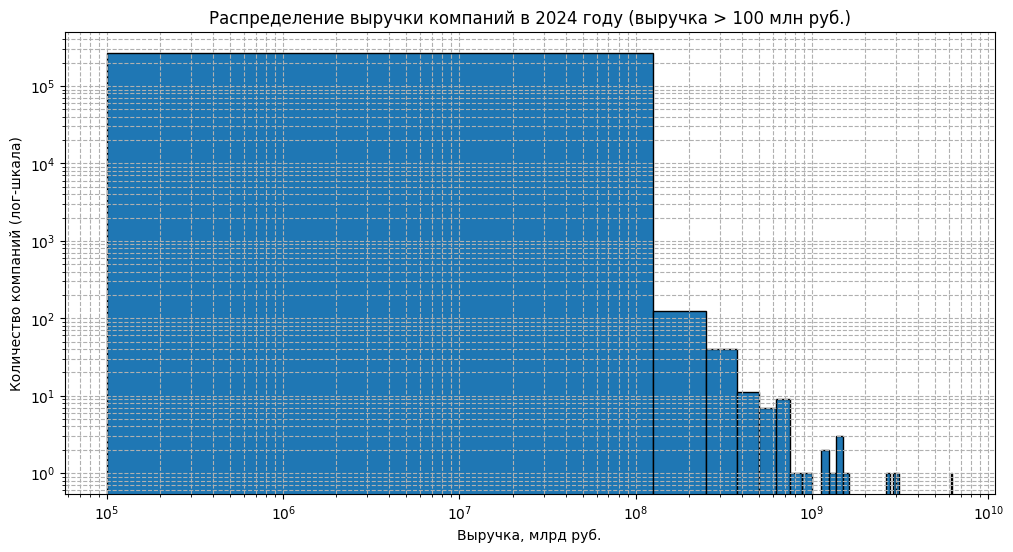

In [19]:
# Визуализация данных
# Для визуализации можно конвертировать небольшие подвыборки в pandas
import matplotlib.pyplot as plt

# Пример: гистограмма распределения выручки
plt.figure(figsize=(12, 6))
# Конвертируем в pandas для визуализации (только для небольших подвыборок!)
df_pd = df_2024_sample.select(['line_2110']).to_pandas()
df_pd['line_2110'].hist(bins=50, edgecolor='black')
plt.xlabel('Выручка, млрд руб.')
plt.ylabel('Количество компаний (лог-шкала)')
plt.title('Распределение выручки компаний в 2024 году (выручка > 100 млн руб.)')
plt.yscale('log')
plt.xscale('log') # Логарифмическая шкала и для оси X для лучшей читаемости
plt.grid(True, which="both", ls="--")

plt.show()



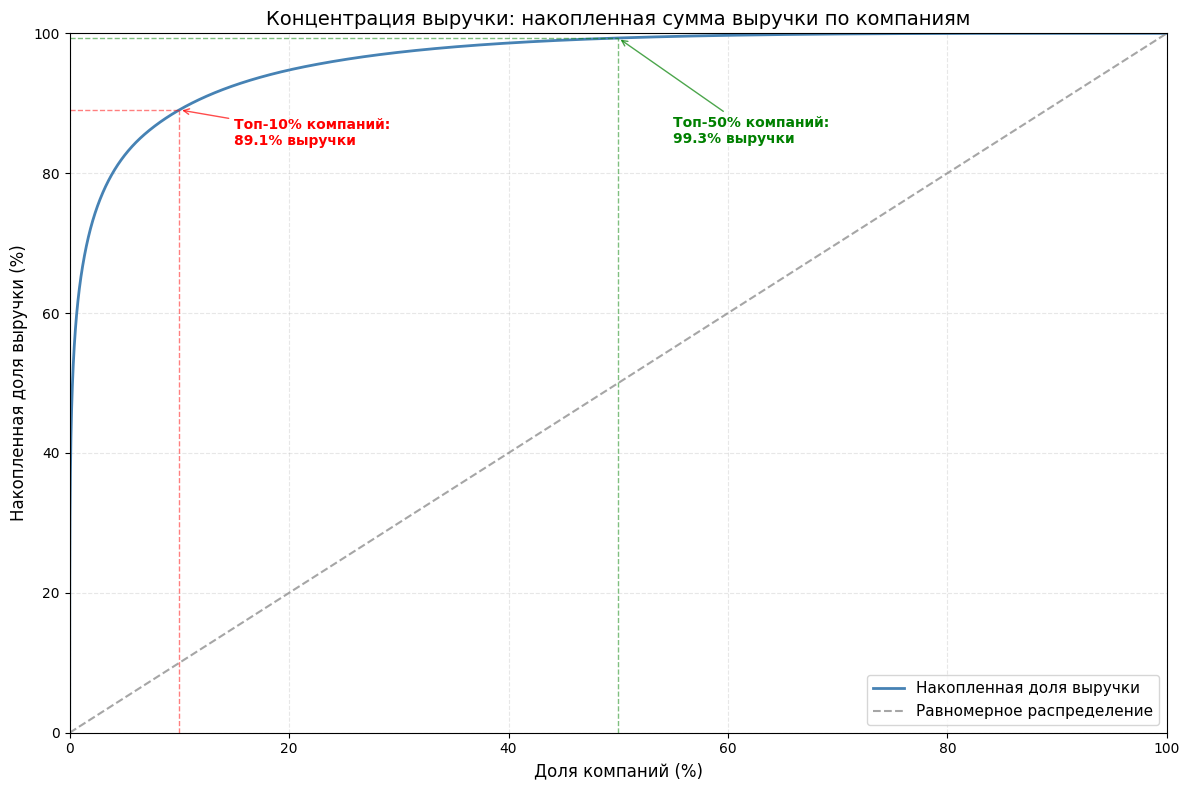


Статистика концентрации выручки:
Всего компаний: 1,666,281
Общая выручка: 335.97 трлн руб.
Топ-10% компаний генерируют: 89.1% выручки
Топ-50% компаний генерируют: 99.3% выручки


In [38]:
# График накопленной суммы выручки (кривая Лоренца)
# Показывает концентрацию выручки: какая доля компаний генерирует какую долю общей выручки

import numpy as np

df_2024_full = lf_2024.collect() # давайте возьмем все данные за 2024 год

# Сортируем компании по выручке по убыванию
df_sorted = (
    df_2024_full
    .filter(pl.col("line_2110").is_finite())    # оставить только конечные значения по выручке 
    .select("line_2110")                        # выбрать нужный столбец
    .sort("line_2110", descending=True)         # сортировка
    .to_pandas()
)


# Рассчитываем накопленную сумму выручки
df_sorted['cumulative_revenue'] = df_sorted['line_2110'].cumsum()
total_revenue = df_sorted['line_2110'].sum()

# Рассчитываем проценты
df_sorted['cumulative_pct_revenue'] = (df_sorted['cumulative_revenue'] / total_revenue) * 100
df_sorted['pct_companies'] = (np.arange(1, len(df_sorted) + 1) / len(df_sorted)) * 100

# Строим график
plt.figure(figsize=(12, 8))

# График накопленной доли выручки
plt.plot(df_sorted['pct_companies'], df_sorted['cumulative_pct_revenue'], 
         linewidth=2, label='Накопленная доля выручки', color='steelblue')

# Линия равенства (если бы выручка распределялась равномерно)
plt.plot([0, 100], [0, 100], '--', linewidth=1.5, color='gray', 
         label='Равномерное распределение', alpha=0.7)

plt.xlabel('Доля компаний (%)', fontsize=12)
plt.ylabel('Накопленная доля выручки (%)', fontsize=12)
plt.title('Концентрация выручки: накопленная сумма выручки по компаниям', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xlim(0, 100)
plt.ylim(0, 100)

# Добавляем аннотации для ключевых точек
# Топ-10% компаний
top_10_pct_idx = int(len(df_sorted) * 0.1)
if top_10_pct_idx > 0:
    top_10_revenue_pct = df_sorted.iloc[top_10_pct_idx - 1]['cumulative_pct_revenue']
    plt.plot([10, 10], [0, top_10_revenue_pct], 'r--', alpha=0.5, linewidth=1)
    plt.plot([0, 10], [top_10_revenue_pct, top_10_revenue_pct], 'r--', alpha=0.5, linewidth=1)
    plt.annotate(f'Топ-10% компаний:\n{top_10_revenue_pct:.1f}% выручки', 
                xy=(10, top_10_revenue_pct), xytext=(15, top_10_revenue_pct - 5),
                arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
                fontsize=10, color='red', fontweight='bold')

# Топ-50% компаний
top_50_pct_idx = int(len(df_sorted) * 0.5)
if top_50_pct_idx > 0:
    top_50_revenue_pct = df_sorted.iloc[top_50_pct_idx - 1]['cumulative_pct_revenue']
    plt.plot([50, 50], [0, top_50_revenue_pct], 'g--', alpha=0.5, linewidth=1)
    plt.plot([0, 50], [top_50_revenue_pct, top_50_revenue_pct], 'g--', alpha=0.5, linewidth=1)
    plt.annotate(f'Топ-50% компаний:\n{top_50_revenue_pct:.1f}% выручки', 
                xy=(50, top_50_revenue_pct), xytext=(55, top_50_revenue_pct - 15),
                arrowprops=dict(arrowstyle='->', color='green', alpha=0.7),
                fontsize=10, color='green', fontweight='bold')

plt.tight_layout()
plt.show()

# Выводим статистику концентрации
print(f"\nСтатистика концентрации выручки:")
print(f"Всего компаний: {len(df_sorted):,}")
print(f"Общая выручка: {total_revenue / 1_000_000_000:.2f} трлн руб.")
if top_10_pct_idx > 0:
    print(f"Топ-10% компаний генерируют: {top_10_revenue_pct:.1f}% выручки")
if top_50_pct_idx > 0:
    print(f"Топ-50% компаний генерируют: {top_50_revenue_pct:.1f}% выручки")



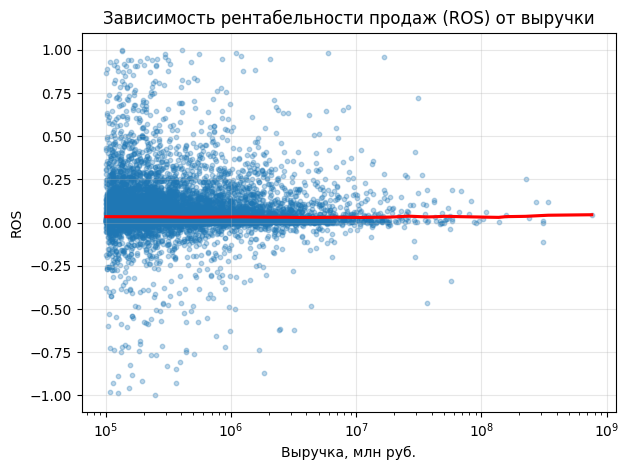

In [49]:
# 2. Scatter plot зависимости ROS от выручки
import seaborn as sns

df_ratios_pd = df_with_ratios.to_pandas()

# Отфильтруем выбросы для наглядности
# Выручка в тыс. руб., поэтому фильтруем разумные значения (от 1 млн до 100 млрд руб.)
df_ratios_pd_filtered = df_ratios_pd[
    (df_ratios_pd['ros'].between(-1, 1)) &  # ROS от -100% до +100%
    (df_ratios_pd['line_2110'] > 0) &  # Выручка положительная
    (df_ratios_pd['line_2110'] < 100_000_000_000)  # Выручка < 100 млрд руб.
]

# Семпл для ускорения визуализации
sample_size = 10_000
df_ratios_sampled = df_ratios_pd_filtered.sample(
    n=min(sample_size, len(df_ratios_pd_filtered)),
    random_state=42
)

sns.regplot(
    data=df_ratios_sampled,
    x='line_2110',
    y='ros',
    lowess=True,         # LOESS
    scatter_kws={'s': 10, 'alpha': 0.3},
    line_kws={'color': 'red'}
)

plt.xscale('log')
plt.title('Зависимость рентабельности продаж (ROS) от выручки')
plt.xlabel('Выручка, млн руб.')
plt.ylabel('ROS')
plt.xscale('log')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

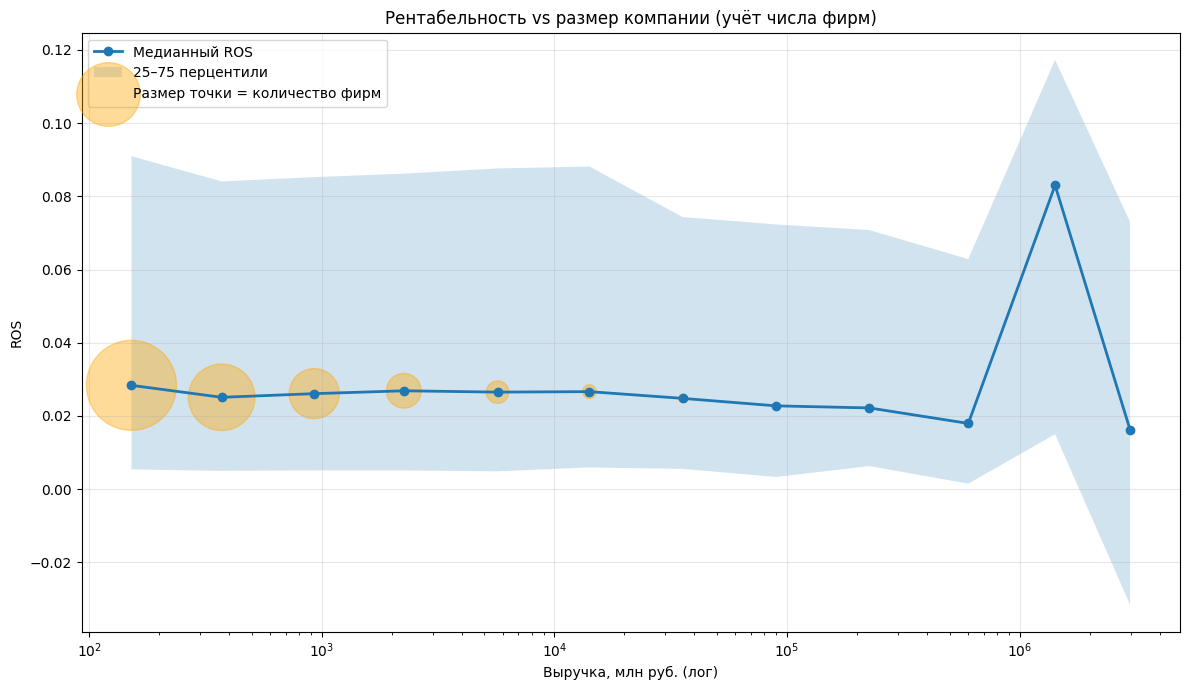

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Фильтрация (если нужна)
df = df_ratios_pd.copy()

# Выручка в млн руб.
df['rev_mln'] = df['line_2110'] / 1_000

# 2. Логарифмические бины по выручке
n_bins = 12  # можешь поменять
bins = np.logspace(
    np.log10(df['rev_mln'].min()),
    np.log10(df['rev_mln'].max()),
    n_bins + 1
)

# создаётся rev_bin
df['rev_bin'] = pd.cut(df['rev_mln'], bins=bins)

# 3. Группировка по rev_bin
grp = (
    df.groupby('rev_bin', observed=True)
      .agg(
          rev_mid=('rev_mln', 'median'),
          ros_med=('ros', 'median'),
          ros_q25=('ros', lambda x: x.quantile(0.25)),
          ros_q75=('ros', lambda x: x.quantile(0.75)),
          count=('ros', 'size')
      )
      .dropna()
)

# 4. График
plt.figure(figsize=(12, 7))

plt.plot(grp['rev_mid'], grp['ros_med'], marker='o', linewidth=2, label='Медианный ROS')

plt.fill_between(
    grp['rev_mid'],
    grp['ros_q25'],
    grp['ros_q75'],
    alpha=0.2,
    label='25–75 перцентили'
)

# пузырьки по числу фирм
plt.scatter(
    grp['rev_mid'],
    grp['ros_med'],
    s=grp['count'] * 0.05,  # масштаб можно подправить
    alpha=0.4,
    color='orange',
    label='Размер точки = количество фирм'
)

plt.xscale('log')
plt.xlabel('Выручка, млн руб. (лог)')
plt.ylabel('ROS')
plt.title('Рентабельность vs размер компании (учёт числа фирм)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


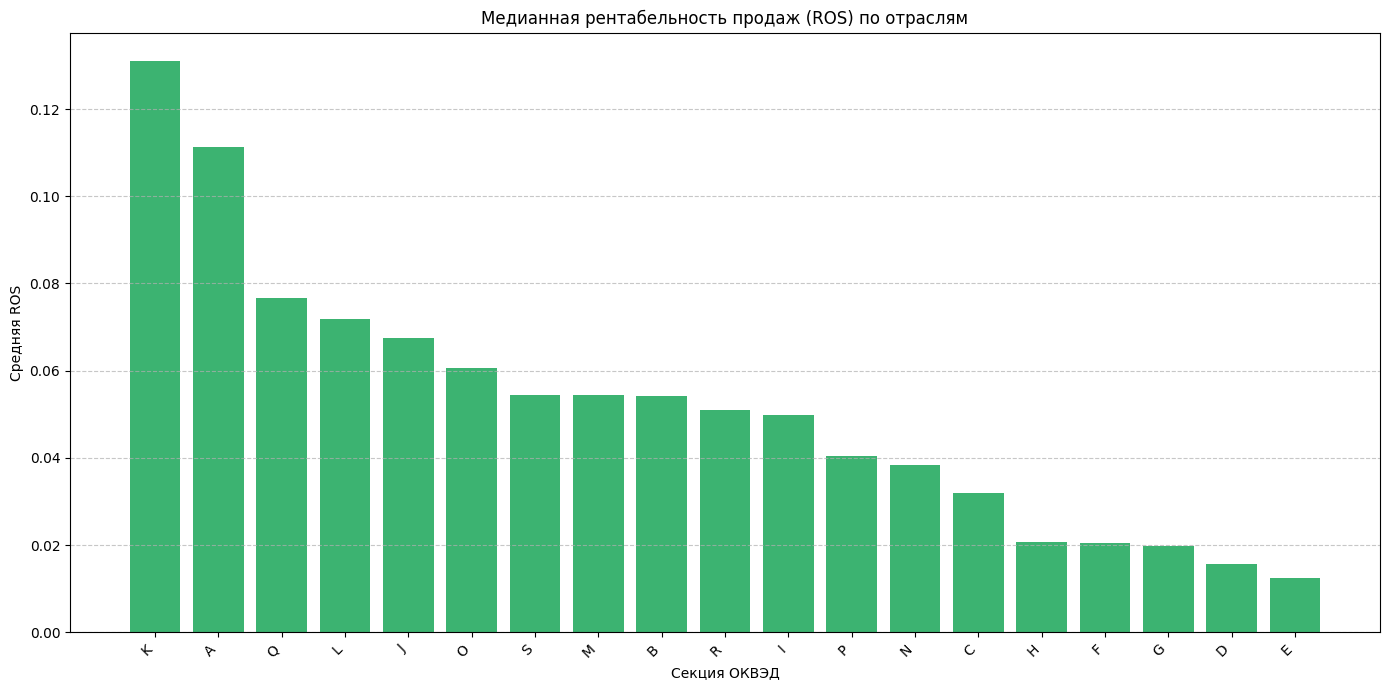

In [59]:

# 3. Столбчатая диаграмма средних значений ROS по отраслям
# Рассчитаем медианны ROS по отраслям с помощью Polars
avg_ros_by_industry = (
    df_with_ratios
    .group_by('okved_section')
    .agg(pl.median('ros').alias('avg_ros'))
    .sort('avg_ros', descending=True)
    .to_pandas()
)

plt.figure(figsize=(14, 7))
plt.bar(avg_ros_by_industry['okved_section'], avg_ros_by_industry['avg_ros'], color='mediumseagreen')
plt.title('Медианная рентабельность продаж (ROS) по отраслям')
plt.xlabel('Секция ОКВЭД')
plt.ylabel('Средняя ROS')
plt.xticks(rotation=45, ha="right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


---

##  Практическое задание 6: Визуализация данных

**Время: 5-7 минут**

**Задание:**
Используя данные с рассчитанными финансовыми показателями:

1. Постройте гистограмму распределения активов. Используйте логарифмическую шкалу по оси Y.

2. Постройте scatter plot зависимости активов от выручки в лог-шкалах.

3. Постройте столбчатую диаграмму средних значений ROS по отраслям (секциям ОКВЭД).

**Подсказка:** 
- Конвертируйте данные в pandas для визуализации: `.to_pandas()`
- Используйте `plt.hist()`, `plt.scatter()`, `plt.bar()` из matplotlib
- Не забудьте добавить подписи осей и заголовки



### Практические задания для следующего занятия:

**Задание 1: Анализ динамики отрасли**
- Выберите одну отрасль (секцию ОКВЭД)
- Проанализируйте динамику средних показателей за 2020-2024 годы
- Постройте графики трендов
- Объясните изменения

**Задание 2: Региональный рейтинг**
- Создайте рейтинг регионов по финансовым показателям
- Определите топ-5 и аутсайдеров
- Визуализируйте результаты на карте или графиках

**Задание 3: Поиск инвестиционных возможностей**
- Найдите компании с высоким потенциалом роста
- Критерии: растущая выручка, положительная динамика прибыли, разумная долговая нагрузка
- Создайте список из 10-20 компаний с обоснованием

**Задание 4: Отраслевой бенчмарк**
- Выберите 3-5 компаний из одной отрасли
- Сравните их показатели между собой и со средними по отрасли
- Определите лидера и объясните причины успеха

**Задание 5: Анализ кризисных периодов**
- Сравните показатели компаний в 2020-2021 (пандемия) и 2022-2023 (санкции)
- Определите, какие отрасли пострадали больше всего
- Какие отрасли показали устойчивость?

---

**Подготовка к следующему занятию:**
- Повторите материал по работе с Polars LazyFrame
- Изучите документацию по matplotlib/seaborn для визуализации
- Подумайте, какие отрасли или регионы вас интересуют для анализа


## Практические примеры использования RFSD

В этом разделе представлены типичные задачи анализа финансовых данных компаний с использованием RFSD. Примеры основаны на реальных use cases из репозитория [RFSD](https://github.com/irlcode/RFSD/tree/main/use_cases).

### Пример 1: Анализ по отраслям (ОКВЭД)

Сравнение средних финансовых показателей между отраслями экономики.


Сравнение отраслей по финансовым показателям:
shape: (19, 7)
┌──────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┬─────────────┐
│ okved_sectio ┆ количество_ ┆ средняя_выр ┆ средняя_при ┆ средняя_ROS ┆ средняя_ROA ┆ средний_лев │
│ n            ┆ компаний    ┆ учка        ┆ быль        ┆ ---         ┆ ---         ┆ еридж       │
│ ---          ┆ ---         ┆ ---         ┆ ---         ┆ f64         ┆ f64         ┆ ---         │
│ str          ┆ u32         ┆ f64         ┆ f64         ┆             ┆             ┆ f64         │
╞══════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╪═════════════╡
│ F            ┆ 23568       ┆ 864991.8277 ┆ 38458.40440 ┆ 0.052236    ┆ 1.557174    ┆ 0.780792    │
│              ┆             ┆ 75          ┆ 4           ┆             ┆             ┆             │
│ L            ┆ 6298        ┆ 474638.5309 ┆ 74489.20292 ┆ 0.165839    ┆ 0.897555    ┆ 0.717794    │
│              ┆             ┆

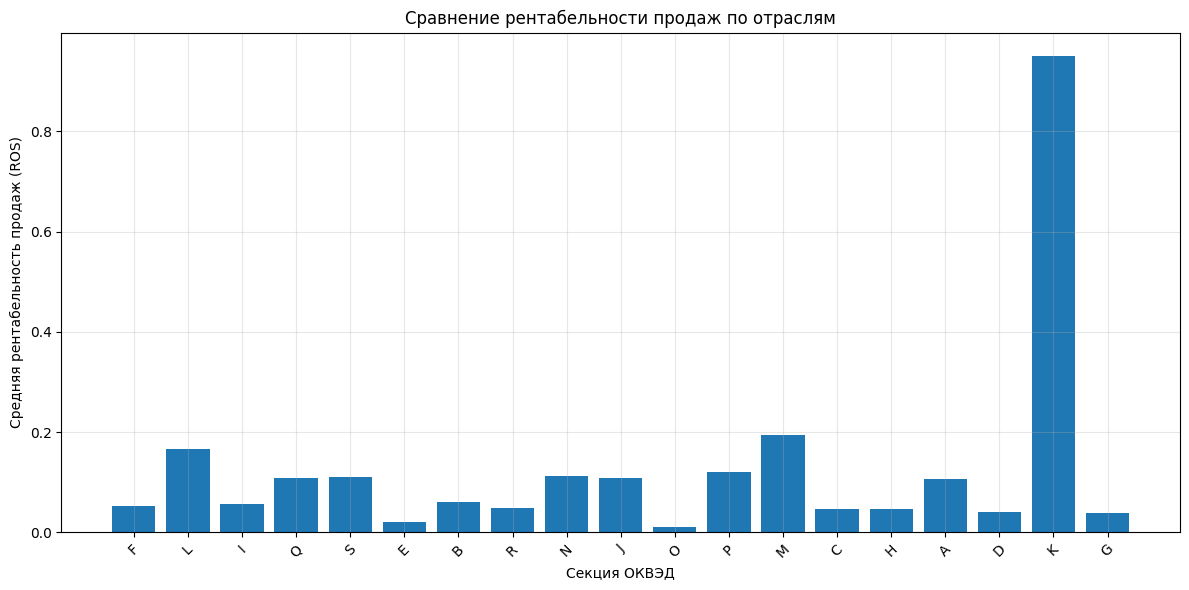

In [60]:
# Пример 1: Сравнение отраслей по финансовым показателям
# Используем данные с рассчитанными показателями

if 'df_with_ratios' in locals():
    # Проверка и добавление столбца 'leverage', если он отсутствует
    if 'leverage' not in df_with_ratios.columns:
        print("Столбец 'leverage' не найден. Пересчитываем...")
        df_with_ratios = df_with_ratios.with_columns(
            ((pl.col('line_1400') + pl.col('line_1500')) / pl.col('line_1600')).alias('leverage')
        ).filter(
            pl.col('leverage').is_finite()
        )

    # Группировка по секциям ОКВЭД и расчет средних показателей
    industry_analysis = (
        df_with_ratios
        .group_by('okved_section')
        .agg([
            pl.count().alias('количество_компаний'),
            pl.mean('line_2110').alias('средняя_выручка'),
            pl.mean('line_2400').alias('средняя_прибыль'),
            pl.mean('ros').alias('средняя_ROS'),
            pl.mean('roa').alias('средняя_ROA'),
            pl.mean('leverage').alias('средний_леверидж'),
        ])
        .filter(pl.col('количество_компаний') >= 3)  # Минимум 3 компании в отрасли
        .sort('средняя_ROA', descending=True)
    )
    
    print("Сравнение отраслей по финансовым показателям:")
    print(industry_analysis)
    
    # Визуализация: сравнение ROS по отраслям
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 6))
    industry_pd = industry_analysis.select(['okved_section', 'средняя_ROS']).to_pandas()
    plt.bar(industry_pd['okved_section'], industry_pd['средняя_ROS'])
    plt.xlabel('Секция ОКВЭД')
    plt.ylabel('Средняя рентабельность продаж (ROS)')
    plt.title('Сравнение рентабельности продаж по отраслям')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
else:
    print("Сначала выполните расчет финансовых показателей (ячейка выше)")


### Пример 2: Поиск компаний по критериям

Найти компании, соответствующие определенным финансовым критериям (например, высокая рентабельность и низкая долговая нагрузка).


In [61]:
# Пример 2: Поиск "здоровых" компаний
# Критерии: высокая рентабельность, низкая долговая нагрузка, хорошая ликвидность

if 'df_with_ratios' in locals():
    # Определяем критерии поиска
    healthy_companies = (
        df_with_ratios
        .filter(
            (pl.col('ros') > 0.1) &           # ROS > 10%
            (pl.col('roa') > 0.05) &          # ROA > 5%
            (pl.col('leverage') < 0.7)
        )
        .select([
            'inn', 'region', 'okved_section',
            'line_2110', 'line_2400',
            'ros', 'roa', 'leverage'
        ])
        .sort('ros', descending=True)
        .head(20)
    )
    
    print(f"Найдено {len(healthy_companies)} компаний с высокими показателями:")
    print(healthy_companies)
    
    # Анализ распределения по отраслям
    print("\nРаспределение найденных компаний по отраслям:")
    (
        healthy_companies
        .group_by('okved_section')
        .agg(pl.count().alias('количество'))
        .sort('количество', descending=True)
    )
else:
    print("Сначала выполните расчет финансовых показателей")


Найдено 20 компаний с высокими показателями:
shape: (20, 8)
┌────────────┬────────────┬────────────┬───────────┬────────────┬────────────┬──────────┬──────────┐
│ inn        ┆ region     ┆ okved_sect ┆ line_2110 ┆ line_2400  ┆ ros        ┆ roa      ┆ leverage │
│ ---        ┆ ---        ┆ ion        ┆ ---       ┆ ---        ┆ ---        ┆ ---      ┆ ---      │
│ str        ┆ str        ┆ ---        ┆ f64       ┆ f64        ┆ f64        ┆ f64      ┆ f64      │
│            ┆            ┆ str        ┆           ┆            ┆            ┆          ┆          │
╞════════════╪════════════╪════════════╪═══════════╪════════════╪════════════╪══════════╪══════════╡
│ 7714789489 ┆ moscow     ┆ M          ┆ 130379.0  ┆ 3.5068763e ┆ 268.975548 ┆ 0.130381 ┆ 0.167015 │
│            ┆ city       ┆            ┆           ┆ 7          ┆            ┆          ┆          │
│ 7727160666 ┆ moscow     ┆ M          ┆ 245897.0  ┆ 4.9040628e ┆ 199.43565  ┆ 0.217371 ┆ 0.290016 │
│            ┆ city       ┆    

### Пример 3: Топ компании по показателям

Найти лидеров по различным финансовым показателям (выручка, прибыль, рентабельность).


In [62]:
# Пример 3: Топ-10 компаний по различным показателям

if 'df_with_ratios' in locals():
    print("=" * 80)
    print("ТОП-10 КОМПАНИЙ ПО РАЗЛИЧНЫМ ПОКАЗАТЕЛЯМ")
    print("=" * 80)
    
    # Топ по выручке
    print("\n1. Топ-10 по выручке:")
    top_revenue = (
        df_with_ratios
        .select(['inn', 'region', 'okved_section', 'line_2110', 'ros', 'roa'])
        .sort('line_2110', descending=True)
        .head(10)
        .with_columns([
            (pl.col('line_2110') / 1_000_000_000).alias('выручка_млрд')
        ])
    )
    print(top_revenue.select(['inn', 'okved_section', 'выручка_млрд', 'ros', 'roa']))
    
    # Топ по прибыли
    print("\n2. Топ-10 по прибыли:")
    top_profit = (
        df_with_ratios
        .filter(pl.col('line_2400') > 0)
        .select(['inn', 'region', 'okved_section', 'line_2400', 'ros', 'roa'])
        .sort('line_2400', descending=True)
        .head(10)
        .with_columns([
            (pl.col('line_2400') / 1_000_000_000).alias('прибыль_млрд')
        ])
    )
    print(top_profit.select(['inn', 'okved_section', 'прибыль_млрд', 'ros', 'roa']))
    
    # Топ по рентабельности продаж (ROS)
    print("\n3. Топ-10 по рентабельности продаж (ROS):")
    top_ros = (
        df_with_ratios
        .filter(
            (pl.col('ros').is_finite()) &
            (pl.col('ros') > 0) &
            (pl.col('line_2110') > 100_000_000)  # Минимум 100 млн выручки
        )
        .select(['inn', 'region', 'okved_section', 'line_2110', 'ros', 'roa'])
        .sort('ros', descending=True)
        .head(10)
        .with_columns([
            (pl.col('line_2110') / 1_000_000_000).alias('выручка_млрд'),
            (pl.col('ros') * 100).alias('ROS_процент')
        ])
    )
    print(top_ros.select(['inn', 'okved_section', 'выручка_млрд', 'ROS_процент', 'roa']))
    
    # Топ по рентабельности активов (ROA)
    print("\n4. Топ-10 по рентабельности активов (ROA):")
    top_roa = (
        df_with_ratios
        .filter(
            (pl.col('roa').is_finite()) &
            (pl.col('roa') > 0) &
            (pl.col('line_1600') > 100_000_000)  # Минимум 100 млн активов
        )
        .select(['inn', 'region', 'okved_section', 'line_1600', 'ros', 'roa'])
        .sort('roa', descending=True)
        .head(10)
        .with_columns([
            (pl.col('line_1600') / 1_000_000_000).alias('активы_млрд'),
            (pl.col('roa') * 100).alias('ROA_процент')
        ])
    )
    print(top_roa.select(['inn', 'okved_section', 'активы_млрд', 'ros', 'ROA_процент']))
else:
    print("Сначала выполните расчет финансовых показателей")


ТОП-10 КОМПАНИЙ ПО РАЗЛИЧНЫМ ПОКАЗАТЕЛЯМ

1. Топ-10 по выручке:
shape: (10, 5)
┌────────────┬───────────────┬──────────────┬───────────┬───────────┐
│ inn        ┆ okved_section ┆ выручка_млрд ┆ ros       ┆ roa       │
│ ---        ┆ ---           ┆ ---          ┆ ---       ┆ ---       │
│ str        ┆ str           ┆ f64          ┆ f64       ┆ f64       │
╞════════════╪═══════════════╪══════════════╪═══════════╪═══════════╡
│ 7736050003 ┆ G             ┆ 6.256626     ┆ -0.17203  ┆ -0.04114  │
│ 7708004767 ┆ M             ┆ 3.046944     ┆ 0.24041   ┆ 0.255773  │
│ 7825706086 ┆ G             ┆ 2.91988      ┆ 0.015225  ┆ 0.035787  │
│ 2310031475 ┆ G             ┆ 2.69949      ┆ 0.017195  ┆ 0.034417  │
│ 1644003838 ┆ B             ┆ 1.563778     ┆ 0.160749  ┆ 0.168356  │
│ 7703562479 ┆ K             ┆ 1.491551     ┆ 0.000746  ┆ 0.905435  │
│ 5902201970 ┆ B             ┆ 1.443799     ┆ 0.097122  ┆ 0.12121   │
│ 5003021311 ┆ G             ┆ 1.420365     ┆ -0.027422 ┆ -0.022657 │
│ 860804849

### Пример 4: Сравнительный анализ компаний одной отрасли

Сравнение финансовых показателей компаний из одной отрасли для выявления лидеров и аутсайдеров.


In [64]:
# Пример 4: Сравнение компаний одной отрасли
# Выберем секцию G (Торговля оптовая и розничная) как пример

if 'df_with_ratios' in locals():
    # Фильтруем компании из секции G
    sector_g = (
        df_with_ratios
        .filter(pl.col('okved_section') == 'G')
        .filter(pl.col('line_2110') > 500_000)  # Выручка > 500 млн
    )
    
    print(f"Найдено {len(sector_g)} компаний в секции G (Торговля)")
    
    if len(sector_g) > 0:
        # Сравнительная таблица
        comparison = (
            sector_g
            .select([
                'inn', 'region',
                'line_2110', 'line_2400', 'line_1600',
                'ros', 'roa', 'leverage'
            ])
            .with_columns([
                (pl.col('line_2110') / 1_000_000_000).alias('выручка_млрд'),
                (pl.col('line_2400') / 1_000_000_000).alias('прибыль_млрд'),
                (pl.col('line_1600') / 1_000_000_000).alias('активы_млрд'),
                (pl.col('ros') * 100).alias('ROS_%'),
                (pl.col('roa') * 100).alias('ROA_%'),
            ])
            .sort('выручка_млрд', descending=True)
            .head(15)
        )
        
        print("\nСравнительная таблица компаний секции G:")
        print(comparison.select([
            'inn', 'region', 'выручка_млрд', 'прибыль_млрд', 
            'ROS_%', 'ROA_%', 'leverage'
        ]))
        
        # Статистика по отрасли
        print("\nСредние показатели по отрасли:")
        sector_stats = (
            sector_g
            .select([
                pl.mean('line_2110').alias('средняя_выручка'),
                pl.mean('line_2400').alias('средняя_прибыль'),
                pl.mean('ros').alias('средняя_ROS'),
                pl.mean('roa').alias('средняя_ROA'),
                pl.mean('leverage').alias('средний_леверидж'),
            ])
            .with_columns([
                (pl.col('средняя_выручка') / 1_000_000_000).alias('выручка_млрд'),
                (pl.col('средняя_прибыль') / 1_000_000_000).alias('прибыль_млрд'),
                (pl.col('средняя_ROS') * 100).alias('ROS_%'),
                (pl.col('средняя_ROA') * 100).alias('ROA_%'),
            ])
        )
        print(sector_stats.select(['выручка_млрд', 'прибыль_млрд', 'ROS_%', 'ROA_%', 'средний_леверидж']))
    else:
        print("Не найдено компаний в секции G с выручкой > 500 млн руб.")
else:
    print("Сначала выполните расчет финансовых показателей")


Найдено 22009 компаний в секции G (Торговля)

Сравнительная таблица компаний секции G:
shape: (15, 7)
┌────────────┬──────────────────┬──────────────┬──────────────┬───────────┬───────────┬──────────┐
│ inn        ┆ region           ┆ выручка_млрд ┆ прибыль_млрд ┆ ROS_%     ┆ ROA_%     ┆ leverage │
│ ---        ┆ ---              ┆ ---          ┆ ---          ┆ ---       ┆ ---       ┆ ---      │
│ str        ┆ str              ┆ f64          ┆ f64          ┆ f64       ┆ f64       ┆ f64      │
╞════════════╪══════════════════╪══════════════╪══════════════╪═══════════╪═══════════╪══════════╡
│ 7736050003 ┆ sankt-petersburg ┆ 6.256626     ┆ -1.07633     ┆ -17.20304 ┆ -4.113966 ┆ 0.375818 │
│ 7825706086 ┆ sankt-petersburg ┆ 2.91988      ┆ 0.044454     ┆ 1.522454  ┆ 3.5787    ┆ 0.933161 │
│ 2310031475 ┆ krasnodar        ┆ 2.69949      ┆ 0.046419     ┆ 1.719549  ┆ 3.441652  ┆ 0.880268 │
│ 5003021311 ┆ sankt-petersburg ┆ 1.420365     ┆ -0.03895     ┆ -2.742245 ┆ -2.265737 ┆ 0.47108  │
│ 50030

### Пример 5: Анализ динамики показателей за несколько лет

Сравнение финансовых показателей компаний за разные годы для анализа трендов.


In [65]:
def load_rfsd_years_polars(
    years,
    rfsd_path=RFSD_PATH,
    columns=None,
    filters=None,
    lazy=True
):
    """
    Эффективно загружает данные RFSD за несколько лет используя Polars.
    Пропускает годы, для которых не удалось загрузить данные.
    
    Parameters:
    -----------
    years : list of int
        Список лет данных (например, [2022, 2023, 2024])
    rfsd_path : Path or str
        Путь к папке с данными RFSD
    columns : list of str, optional
        Список столбцов для загрузки (None = все столбцы)
    filters : list, optional
        Список фильтров Polars для применения при чтении
    lazy : bool
        Если True, возвращает LazyFrame (рекомендуется для больших данных)
        
    Returns:
    --------
    pl.LazyFrame or pl.DataFrame or None
        LazyFrame или DataFrame с данными за все указанные годы (с добавленным столбцом 'year'),
        или None, если не удалось загрузить данные ни за один год.
    """
    if not isinstance(years, (list, tuple)):
        raise ValueError("years должен быть списком или кортежем")
    
    if len(years) == 0:
        raise ValueError("Список лет не может быть пустым")
    
    # Загружаем данные за каждый год и добавляем столбец 'year'
    lazy_frames = []
    loaded_years = []
    for year in sorted(list(set(years))): # Уникальные отсортированные годы
        lf_year = load_rfsd_year_polars(
            year=year,
            rfsd_path=rfsd_path,
            columns=columns,
            filters=filters,
            lazy=True
        )
        # Проверяем, что данные загрузились
        if lf_year is not None:
            # Добавляем столбец с годом
            lf_year = lf_year.with_columns(pl.lit(year).alias('year'))
            lazy_frames.append(lf_year)
            loaded_years.append(year)
    
    if not lazy_frames:
        warnings.warn("Не удалось загрузить данные ни за один из указанных годов.")
        return None
    
    # Объединяем все LazyFrame в один
    if len(lazy_frames) == 1:
        result_lf = lazy_frames[0]
    else:
        # Собираем каждый год отдельно и объединяем как DataFrame
        # Это необходимо, так как pl.concat для LazyFrame из разных источников может вызывать ошибки
        dfs = [lf.collect() for lf in lazy_frames]
        
        # Объединяем все DataFrame с параметром how='vertical_relaxed'
        # Это позволяет объединять DataFrame с разными типами столбцов (String vs Categorical)
        combined_df = pl.concat(dfs, how='vertical_relaxed')
        
        # Преобразуем обратно в LazyFrame если нужно
        result_lf = combined_df.lazy()
    
    if lazy:
        print(f"Создан LazyFrame для {len(loaded_years)} годов: {loaded_years}")
        if columns:
            print(f"Выбрано {len(columns)} переменных из доступных")
        print("Используйте .collect() для выполнения вычислений")
        return result_lf
    else:
        df = result_lf.collect()
        print(f"Загружено {len(df):,} наблюдений за {len(loaded_years)} годов: {loaded_years}")
        if columns:
            print(f"Загружено {len(columns)} переменных из доступных")
        return df

In [67]:
# Пример 5: Анализ динамики показателей за несколько лет
# Для этого примера нужно загрузить данные за несколько лет

# Загружаем данные за 2022-2024 годы с расчетом показателей
lf_multiyear = load_rfsd_years_polars(
    [2019, 2020,2021, 2022, 2023, 2024],
    columns=key_columns
)

# Применяем фильтры
lf_multiyear_filtered = lf_multiyear.filter(
    (pl.col('filed') == 1) & 
    (pl.col('line_2110') > 1_000)
)

# Рассчитываем показатели на уровне LazyFrame
lf_multiyear_with_ratios = calculate_financial_ratios_polars(lf_multiyear_filtered)

# Фильтруем валидные значения
lf_multiyear_valid = lf_multiyear_with_ratios.filter(
    (pl.col('ros').is_finite()) &
    (pl.col('roa').is_finite())
)


Создан LazyFrame для 2019 года
Выбрано 20 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 2020 года
Выбрано 20 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 2021 года
Выбрано 20 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 2022 года
Выбрано 20 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 2023 года
Выбрано 20 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 2024 года
Выбрано 20 переменных из доступных
Используйте .collect() для выполнения вычислений
Создан LazyFrame для 6 годов: [2019, 2020, 2021, 2022, 2023, 2024]
Выбрано 20 переменных из доступных
Используйте .collect() для выполнения вычислений


In [70]:
calculate_financial_ratios_polars

<function __main__.calculate_financial_ratios_polars(lf)>

In [68]:
df_multiyear = lf_multiyear_valid.collect()

In [78]:
# Анализ динамики по годам
if 'df_multiyear' in locals():
    print("Динамика рентабельности по годам (взвешенная):")

    yearly_stats = (
        df_multiyear
        .group_by('year')
        .agg([
            pl.sum('line_2110').alias('суммарная_выручка'),
            pl.sum('line_2400').alias('суммарная_прибыль'),
            pl.count().alias('количество_компаний')
        ])
        .with_columns([
            # Средняя выручка на фирму
            (pl.col('суммарная_выручка') / pl.col('количество_компаний')).alias('выручка_на_фирму'),
            # Средняя прибыль на фирму
            (pl.col('суммарная_прибыль') / pl.col('количество_компаний')).alias('прибыль_на_фирму'),
            # Взвешенная рентабельность продаж
            (pl.col('суммарная_прибыль') / pl.col('суммарная_выручка')).alias('ROS'),
        ])
        .sort('year')
        .with_columns([
            (pl.col('выручка_на_фирму') / 1_000).alias('выручка_на_фирму_млн'),
            (pl.col('прибыль_на_фирму') / 1_000).alias('прибыль_на_фирму_млн'),
            (pl.col('ROS') * 100).alias('ROS_%')
        ])
    )

    print(yearly_stats.select([
        'year', 
        'количество_компаний', 
        'выручка_на_фирму_млн', 
        'прибыль_на_фирму_млн', 
        'ROS_%'
    ]))
    
   

Динамика рентабельности по годам (взвешенная):
shape: (6, 5)
┌──────┬─────────────────────┬──────────────────────┬──────────────────────┬───────────┐
│ year ┆ количество_компаний ┆ выручка_на_фирму_млн ┆ прибыль_на_фирму_млн ┆ ROS_%     │
│ ---  ┆ ---                 ┆ ---                  ┆ ---                  ┆ ---       │
│ i32  ┆ u32                 ┆ f64                  ┆ f64                  ┆ f64       │
╞══════╪═════════════════════╪══════════════════════╪══════════════════════╪═══════════╡
│ 2019 ┆ 1272702             ┆ 163.264303           ┆ 12.109608            ┆ 7.41718   │
│ 2020 ┆ 1287351             ┆ 155.419315           ┆ 9.641268             ┆ 6.203391  │
│ 2021 ┆ 1290264             ┆ 191.711826           ┆ 21.65814             ┆ 11.297237 │
│ 2022 ┆ 1282770             ┆ 373.208671           ┆ 48.166836            ┆ 12.906141 │
│ 2023 ┆ 1301980             ┆ 237.504531           ┆ 26.940566            ┆ 11.34318  │
│ 2024 ┆ 1303778             ┆ 257.178775        

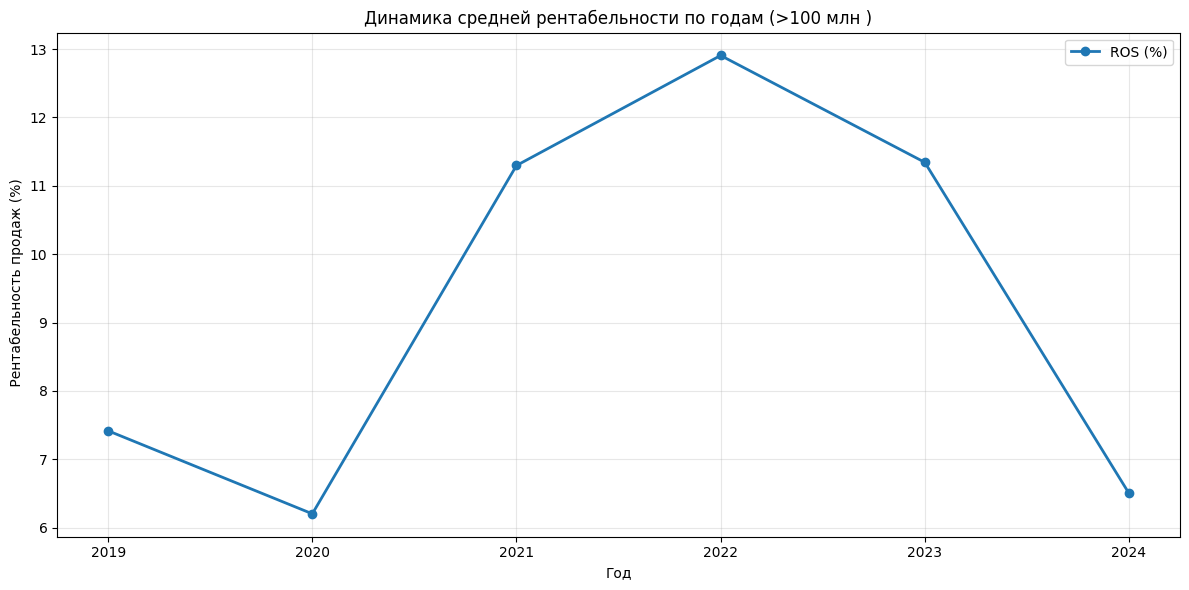

In [83]:
 # Визуализация динамики
  
yearly_pd = yearly_stats.select(['year', 'ROS_%']).to_pandas()
    
plt.figure(figsize=(12, 6))
plt.plot(yearly_pd['year'], yearly_pd['ROS_%'], marker='o', label='ROS (%)', linewidth=2)
plt.xlabel('Год')
plt.ylabel(' Рентабельность продаж (%)')
plt.title('Динамика средней рентабельности по годам (>100 млн )')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Альтернативный способ загрузки: Hugging Face Datasets

Для работы с полным датасетом можно также использовать библиотеку `datasets` от Hugging Face, которая оптимизирована для больших данных:

```python
from datasets import load_dataset

# Загрузка через Hugging Face (автоматически использует эффективные методы)
# dataset = load_dataset('irlspbru/RFSD', split='train')

# Фильтрация и выбор столбцов на уровне загрузки
# dataset = load_dataset(
#     'irlspbru/RFSD', 
#     split='train',
#     columns=key_columns
# )
```

**Преимущества Hugging Face Datasets:**
- Автоматическая оптимизация памяти
- Поддержка streaming для очень больших данных
- Кэширование загруженных данных
- Интеграция с другими инструментами ML

## Дополнительные ресурсы

- **Документация RFSD:** https://github.com/irlcode/RFSD
- **Статья о RFSD:** https://doi.org/10.1038/s41597-025-05150-1
- **Hugging Face:** https://huggingface.co/datasets/irlspbru/RFSD
- **Документация Polars:** https://pola-rs.github.io/polars/

## Рекомендации по работе с большими данными

1. **Используйте Lazy API Polars:** Всегда начинайте с `scan_parquet()` и применяйте фильтры до `.collect()`

2. **Выбирайте только нужные столбцы:** В RFSD более 200 переменных, загружайте только те, что нужны для анализа

3. **Применяйте фильтры на уровне чтения:** Polars может фильтровать данные при чтении Parquet файлов

4. **Работайте с подвыборками:** Для интерактивного анализа загружайте только отфильтрованные данные

5. **Используйте партиционирование:** Данные организованы по годам - загружайте только нужные периоды

6. **Конвертируйте в pandas только для визуализации:** Polars быстрее для вычислений, pandas удобнее для графиков


In [ ]:
from datasets.utils import get_cache_directory

print(get_cache_directory()) # узнать кэш 

# setx HF_HOME "D:\hf_cache"


## Домашняя работа 

начало работы над проектом №1